# **Exploratory Data Analysis (EDA)**

Debido al hecho de que GitHub realiza una representación estática de los cuadernos y no incluye el HTML/JavaScript incrustado que forma un gráfico de trama, y teniendo en cuenta que para presentar la información de una forma más amena e interactiva se hizo uso de la librería `Plotly` de Python la cual crea este tipo de gráficas combinadas con HTML, no es posible verlas directamente en este Notebook, **por lo que lo invitamos a observar este mismo Notebook de forma renderizada en el link de [acá](https://colab.research.google.com/drive/1p0FWH910-PoQFoOyjRlZKUN1Ja_gDq26?usp=sharing)** el cual es un Gooogle Colab con el código que le permitirá interactuar con el mismo.

Las conclusiones sobre estos EDA´s podrán ser encontradas en el archivo `ConclusionesEDA.md` incluido en esta carpeta.

---
El Análisis Exploratorio de Datos, conocido en sus siglas en inglés como Exploratory Data Analysis (EDA), es un enfoque inicial que se utiliza para analizar y comprender la estructura, patrones y relaciones de un conjunto de datos antes de aplicar cualquier modelo o técnica de Machine Learning. El propósito del EDA es identificar aspectos importantes del conjunto de datos, detectar anomalías, probar hipótesis y verificar suposiciones, todo lo cual puede influir en las decisiones sobre qué tipo de modelo o técnicas aplicar más adelante. Este paso se vuelve entonces fundamental en nuestro proyecto, **Cultivando Conexiones: Estudio Integrado de las Dinámicas del Panorama Agrícola en Colombia**, debido a que la base de toda nuestra idea es la búsqueda de patrones y comportamientos que nos ayuden a entender cómo a través de estos podemos hacer frente a las problemáticas de la actualidad del sector agrícola en Colombia.

---


En este notebok se llevan a cabo los análisis exploratorio de datos de las bases de datos:

1. `Exportaciones_agr_colas_no_tradicionales_y_tradicionales_20241102.csv`: De la base de datos brindada por el concurso
2. `_ndice_de_precios_de_insumos_agr_colas_20241104.csv`: De la base de datos brindada por el concurso

Las siguientes bases de datos fueron creadas a partir de la información de exportaciones e importaciones proporcionada por el [Observatorio de Desarrollo Económico](https://observatorio.desarrolloeconomico.gov.co/) para los años 2018-2024 (hasta lo registrado en el presente año). Se construyeron uniendo los datos de exportaciones e importaciones de cada uno de los años dentro de este rango de tiempo. Se generó una única base de datos para exportaciones y otra para importaciones, consolidando toda la información descargada para optimizar el trabajo y evitar retrasos computacionales por la importación de los datos. Estas bases de datos son:

4. `exportations_2018_2024_complete.csv`: Base de datos de exportaciones extraída del Observatorio Económico Nacional
5. `importaciones_2018_2024_complete.csv`: Base de datos de importaciones del Observatorio Económico Nacional

---

Para observar la dimensión de los datasets podemos ver la siguiente imagen:

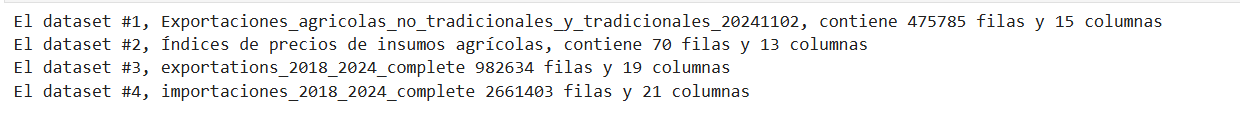


----


Importamos las librerías que usaremos en todo el código, esto con el fin de seguir buenas prácticas de programación.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import plotly.io as pio
pio.renderers.default = "plotly_mimetype"

In [2]:
# Normzalizamos los nombres de las columnas y la información en ellas

def Normalize_Columns(df):
    df.columns=df.columns.str.strip().str.lower().str.replace(" ", "_")
    string_type_cols = df.dtypes[df.dtypes == "object"].index.tolist()
    for col in string_type_cols:
      df[col] = df[col].str.strip().str.lower().str.replace(" ", "_")
    return df

## EDA para base de datos #1: Exportaciones agricolas tradicionales y no tradicionales



In [3]:
# base de datos brindada por el concurso
data = pd.read_csv("Exportaciones_agr_colas_no_tradicionales_y_tradicionales_20241102.csv")
Normalize_Columns(data)
data.head()

,partida,descripcion_partida10_dig,tradición_productos,departamento,pais,año,mes,exportaciones_en_valor_(miles_usd_fob),exportaciones_en_volumen_(toneladas)
0,101210000,"caballos_reproductores_de_raza_pura,_vivos",no_tradicional,antioquia,china,2019,abril,0,0
1,101210000,"caballos_reproductores_de_raza_pura,_vivos",no_tradicional,antioquia,china,2020,febrero,0,0
2,101210000,"caballos_reproductores_de_raza_pura,_vivos",no_tradicional,antioquia,china,2022,enero,0,0
3,101210000,"caballos_reproductores_de_raza_pura,_vivos",no_tradicional,antioquia,china,2022,abril,0,0
4,101210000,"caballos_reproductores_de_raza_pura,_vivos",no_tradicional,antioquia,china,2023,junio,0,0


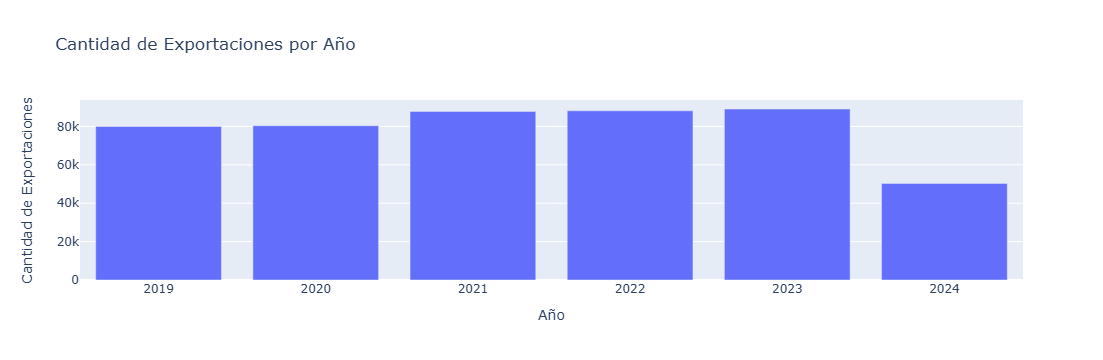

In [4]:
# Exportaciones por año
exportaciones_por_año = data.groupby('año').size().reset_index(name='exportaciones')
fig = px.bar(exportaciones_por_año, x='año', y='exportaciones', title='Cantidad de Exportaciones por Año')
fig.update_layout(xaxis_title='Año', yaxis_title='Cantidad de Exportaciones')
fig.show()

En esta gráfica podemos observar un crecimiento lineal con respecto a la cantidad de exportaciones de productos agrícolas que se han realizado desde los años 2019 a 2023

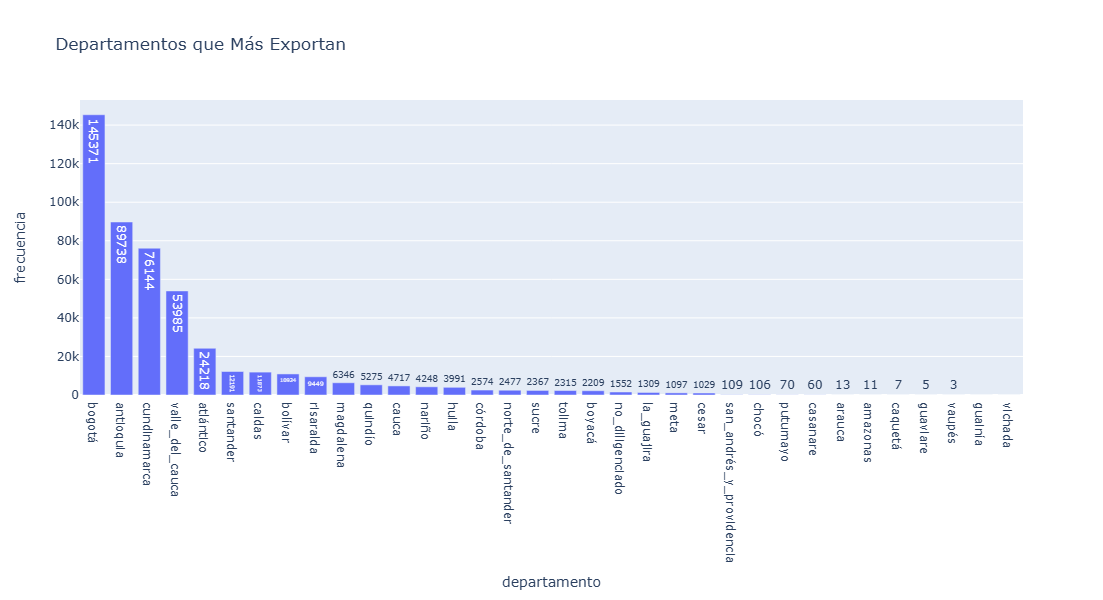

In [5]:
# departamentos que mas exportan
top_departamentos = data['departamento'].value_counts().reset_index()
top_departamentos.columns = ['departamento', 'frecuencia']

fig = px.bar(
    top_departamentos,
    x='departamento',
    y='frecuencia',
    title='Departamentos que Más Exportan',
    text='frecuencia'
)

fig.update_layout(showlegend=False, height=600)
fig.show()


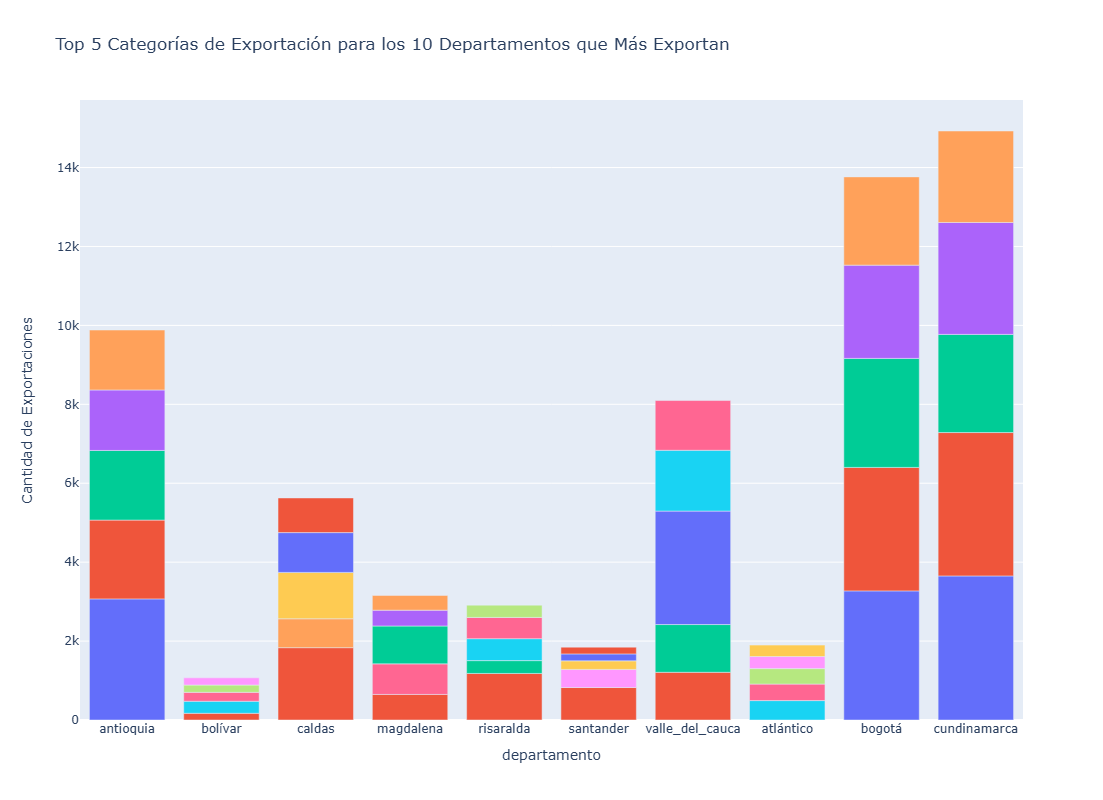

In [6]:
top_10_departamentos = data['departamento'].value_counts().nlargest(10).index

filtered_data = data[data['departamento'].isin(top_10_departamentos)]
top_categorias_por_departamento = (
    filtered_data.groupby(['departamento', 'descripcion_partida10_dig'])
    .size()
    .reset_index(name='frecuencia')
    .sort_values(['departamento', 'frecuencia'], ascending=[True, False])
    .groupby('departamento')
    .head(5)
)

fig = px.bar(
    top_categorias_por_departamento,
    x='departamento',
    y='frecuencia',
    color='descripcion_partida10_dig',
    title='Top 5 Categorías de Exportación para los 10 Departamentos que Más Exportan',
    labels={'descripcion_partida10_dig': 'Categoría de Exportación', 'frecuencia': 'Cantidad de Exportaciones'}
)

fig.update_layout(showlegend=False, height=800)  
fig.update_traces(hovertemplate='Departamento: %{x}<br>Categoría: %{marker.color}<br>Frecuencia: %{y}')
fig.show()

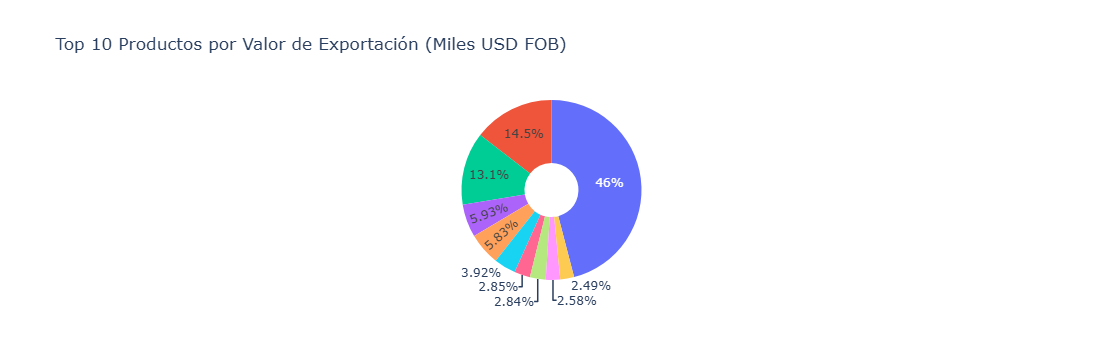

In [7]:
# TOP 10 Productos por valor de Exportacion

top_10_valores_exportacion = data.groupby('descripcion_partida10_dig')['exportaciones_en_valor_(miles_usd_fob)'].sum().nlargest(10).reset_index()

fig = px.pie(
    top_10_valores_exportacion,
    values='exportaciones_en_valor_(miles_usd_fob)',
    names='descripcion_partida10_dig',
    title='Top 10 Productos por Valor de Exportación (Miles USD FOB)',
    hole=0.3
)

fig.update_traces(hovertemplate="<b>%{label}</b><br>Valor de Exportación: %{value} Miles USD FOB")
fig.update_layout(showlegend=False)
fig.show()

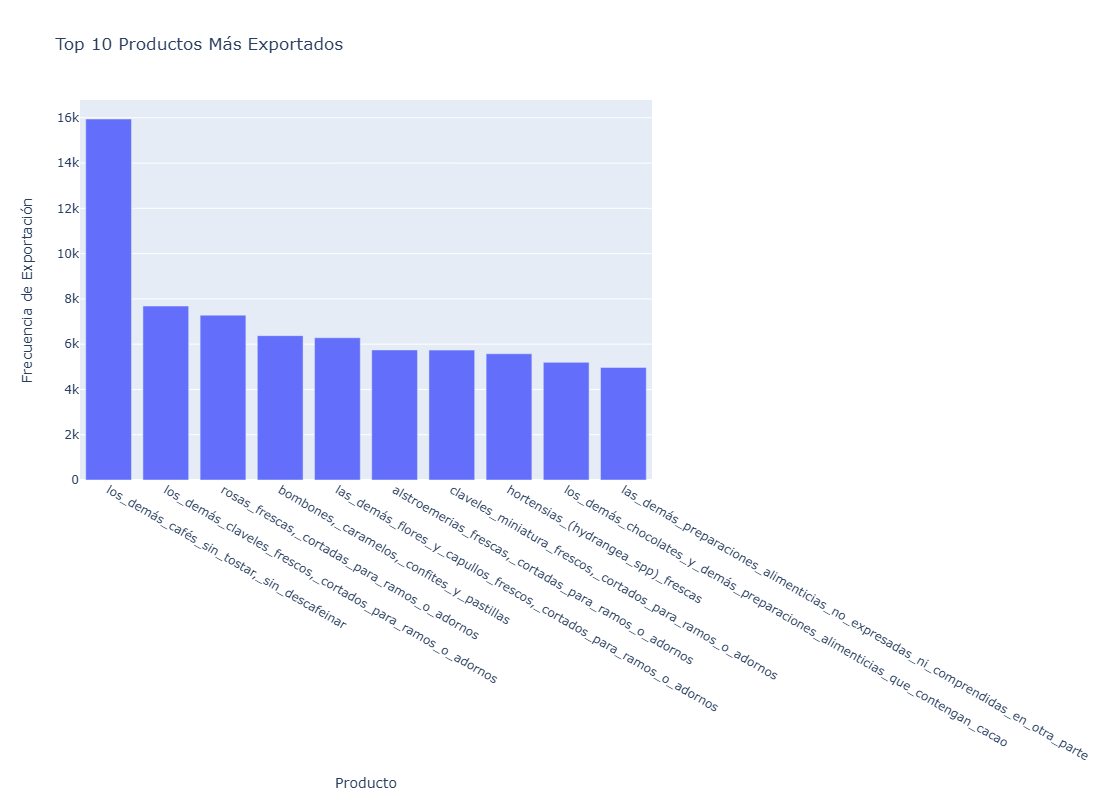

In [8]:
# Top 10 Productos más exportados

top_productos = data['descripcion_partida10_dig'].value_counts().nlargest(10).reset_index()
top_productos.columns = ['descripcion_partida10_dig', 'frecuencia']
total_exportaciones = top_productos['frecuencia'].sum()
top_productos['porcentaje'] = (top_productos['frecuencia'] / total_exportaciones) * 100

fig = px.bar(
    top_productos, 
    x='descripcion_partida10_dig', 
    y='frecuencia', 
    title='Top 10 Productos Más Exportados',
    labels={'descripcion_partida10_dig': 'Producto', 'frecuencia': 'Frecuencia de Exportación'},
    height=800,
    hover_data={'porcentaje': ':.2f'}  # Mostrar el porcentaje con 2 decimales
)

fig.update_layout(showlegend=False)
fig.update_traces(
    hovertemplate="<b>%{x}</b><br>Frecuencia: %{y}<br>Porcentaje: %{customdata[0]:.2f}%"
)

fig.show()

In [9]:
data['exportaciones_en_valor_(miles_usd_fob)'] = np.log1p(data['exportaciones_en_valor_(miles_usd_fob)'])
data["exportaciones_en_volumen_(toneladas)"] = np.log1p(data["exportaciones_en_volumen_(toneladas)"])
data["tradición_productos"] = data["tradición_productos"].map({"no_tradicional": 0, "tradicional": 1})

<AxesSubplot:xlabel='tradición_productos', ylabel='Count'>

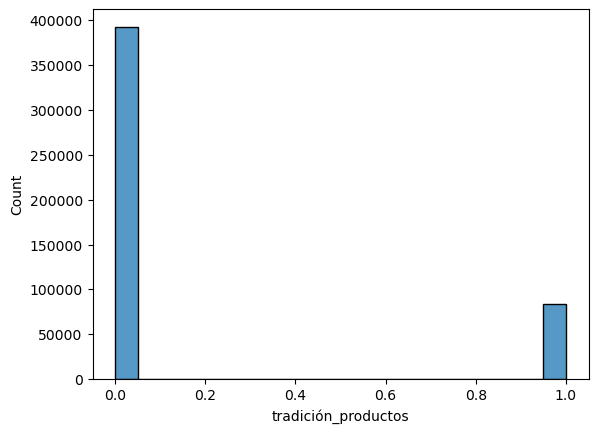

In [10]:
sns.histplot(data.tradición_productos)

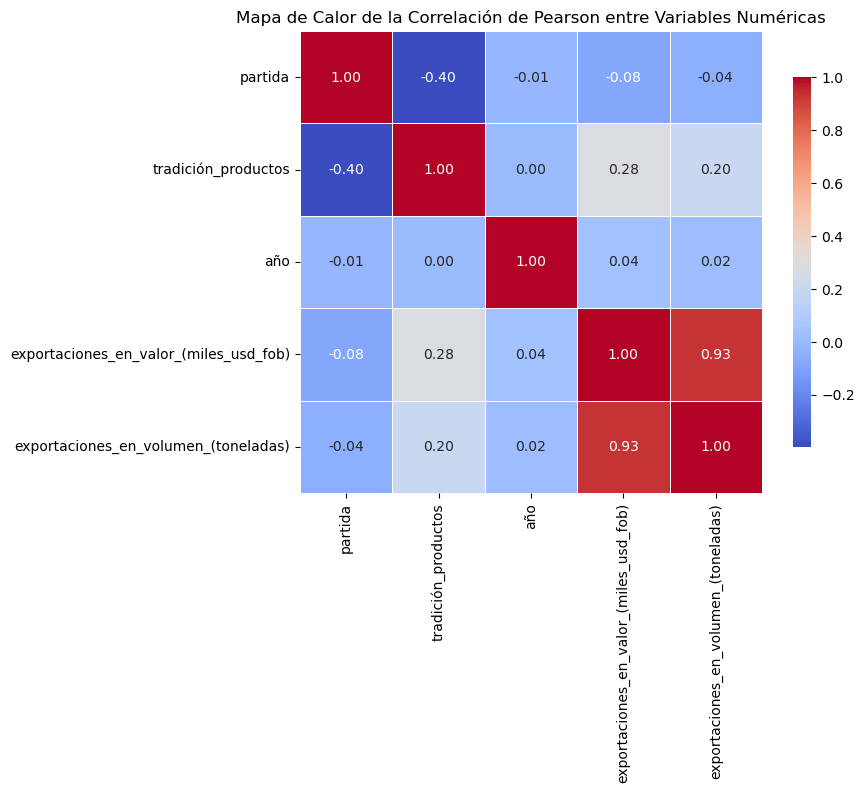

In [11]:
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr(method='pearson')
plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=0.5)
plt.title('Mapa de Calor de la Correlación de Pearson entre Variables Numéricas')
plt.show()

<AxesSubplot:xlabel='exportaciones_en_volumen_(toneladas)', ylabel='exportaciones_en_valor_(miles_usd_fob)'>

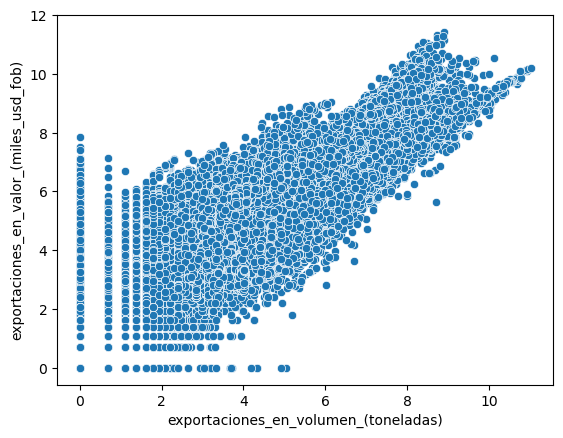

In [12]:
sns.scatterplot(data=data, x="exportaciones_en_volumen_(toneladas)", y="exportaciones_en_valor_(miles_usd_fob)")

## **EDA bases de datos #2: Índice de precios de insumos agrícolas**

In [13]:
# base de datos brindada por el concurso
data2 = pd.read_csv("_ndice_de_precios_de_insumos_agr_colas_20241104.csv")
data2.head()

,Fecha,Indice_total,Total_Fertilizantes,Total_Plaguicidas,Total_Otros,Total_Simples,Total_Compuestos,Total_Herbicidas,Total_Fungicidas,Total_Insecticidas,...,Metomil,Tiametoxam + lambdacihalotrina,Abamectina,Imidacloprid,Profenofos + cipermetrina,Cipermetrina,Profenofos,Total_Coadyuvantes,Total_Reguladores,Total_Molusquicidas
0,12/2018,90.67,90.36,91.24,NaN,91.57,89.41,93.56,90.30,87.04,...,82.84,93.01,90.97,92.52,80.13,85.94,83.91,0.0,0.0,0.0
1,01/2019,92.72,93.49,91.31,NaN,95.64,91.81,93.51,90.47,87.30,...,83.39,92.81,92.02,91.80,80.17,85.39,83.87,0.0,0.0,0.0
2,02/2019,94.06,95.59,91.29,NaN,98.04,93.68,93.34,90.64,87.43,...,82.97,92.90,92.77,92.15,80.44,87.05,83.71,0.0,0.0,0.0
3,03/2019,95.22,97.22,91.58,NaN,99.49,95.45,93.51,91.24,87.72,...,83.33,93.44,92.33,92.21,80.20,87.75,83.82,0.0,0.0,0.0
4,04/2019,95.34,97.27,91.85,NaN,99.19,95.77,93.62,91.63,88.23,...,84.57,93.58,92.27,92.93,81.78,89.43,84.19,0.0,0.0,0.0


In [14]:
data2.columns=data2.columns.str.strip().str.lower().str.replace(" ", "_")
string_type_cols = data2.dtypes[data2.dtypes == "object"].index.tolist()
for col in string_type_cols:
  data2[col] = data2[col].str.strip().str.lower().str.replace(" ", "_")

In [15]:
# Descartamos las columnas especificas de fertilizantes y dejamos solo las totales por facilidad de entendimiento

data2.drop(columns=['urea_46%', 'urea_sulfato',
       'dap_18-46', 'kcl_0-0-60', 'sam', '15-15-15', '25-4-24', '17-6-18-2',
       '18-18-18', '31-8-8', '12-24-12', '13-26-6', '15-4-23', '10-20-30',
       '28-4-0-6', 'glifosato', 'paraquat', 'propanil', '2,4-d_+_picloram',
       '2,4-d', 'aminopiralid_+_2,4-d', 'diuron', 'glufosinato_de_amonio',
       'picloram', 'oxadiazon', 'metsulfuron_metil', 'pendimetalin',
       'clorotalonil', 'difenoconazol', 'mancozeb', 'mancozeb_+_cimoxanil',
       'azoxistrobin_+_difenoconazol', 'dimetomorf',
       'tebuconazol_+_trifloxistrobin', 'propineb_+_fluopicolide',
       'mancozeb_+_metalaxil-m', 'clorpirifos', 'fipronil', 'metomil',
       'tiametoxam_+_lambdacihalotrina', 'abamectina', 'imidacloprid',
       'profenofos_+_cipermetrina', 'cipermetrina', 'profenofos',
       'total_coadyuvantes'], inplace=True)

data2.head()

,fecha,indice_total,total_fertilizantes,total_plaguicidas,total_otros,total_simples,total_compuestos,total_herbicidas,total_fungicidas,total_insecticidas,total_reguladores,total_molusquicidas
0,12/2018,90.67,90.36,91.24,NaN,91.57,89.41,93.56,90.30,87.04,0.0,0.0
1,01/2019,92.72,93.49,91.31,NaN,95.64,91.81,93.51,90.47,87.30,0.0,0.0
2,02/2019,94.06,95.59,91.29,NaN,98.04,93.68,93.34,90.64,87.43,0.0,0.0
3,03/2019,95.22,97.22,91.58,NaN,99.49,95.45,93.51,91.24,87.72,0.0,0.0
4,04/2019,95.34,97.27,91.85,NaN,99.19,95.77,93.62,91.63,88.23,0.0,0.0


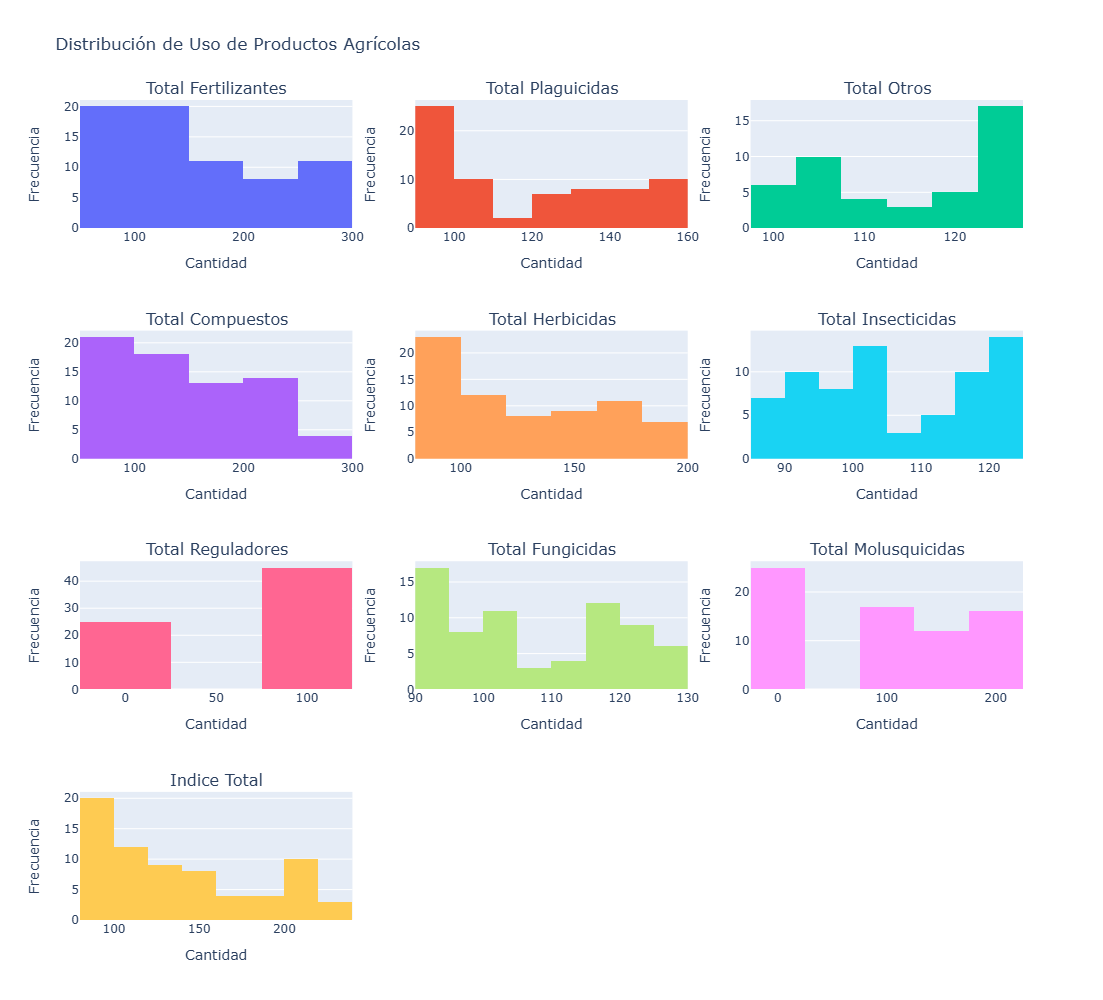

In [16]:
fig = sp.make_subplots(
    rows=4, cols=3,
    subplot_titles=[
        "Total Fertilizantes", "Total Plaguicidas", "Total Otros",
        "Total Compuestos", "Total Herbicidas", "Total Insecticidas",
        "Total Reguladores", "Total Fungicidas", "Total Molusquicidas", "Indice Total"
    ]
)

variables = [
    ("total_fertilizantes", "Total Fertilizantes"),
    ("total_plaguicidas", "Total Plaguicidas"),
    ("total_otros", "Total Otros"),
    ("total_compuestos", "Total Compuestos"),
    ("total_herbicidas", "Total Herbicidas"),
    ("total_insecticidas", "Total Insecticidas"),
    ("total_reguladores", "Total Reguladores"),
    ("total_fungicidas", "Total Fungicidas"),
    ("total_molusquicidas", "Total Molusquicidas"),
    ("indice_total", "Indice Total")
]

for idx, (column, title) in enumerate(variables):
    row = idx // 3 + 1
    col = idx % 3 + 1
    fig.add_trace(go.Histogram(x=data2[column], name=title), row=row, col=col)

fig.update_layout(
    height=1000, width=1200,
    title_text="Distribución de Uso de Productos Agrícolas",
    showlegend=False
)
fig.update_xaxes(title_text="Cantidad")
fig.update_yaxes(title_text="Frecuencia")
fig.show()

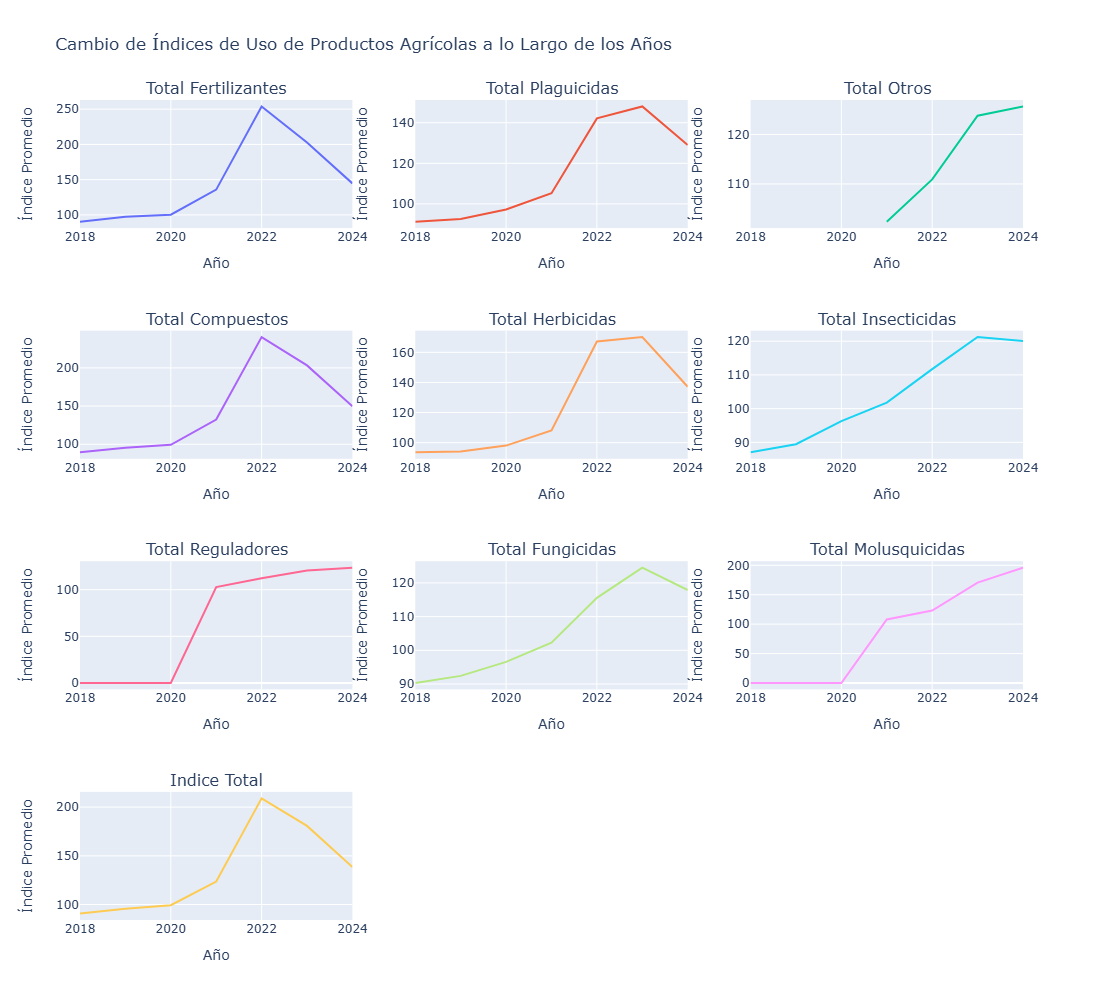

In [17]:
# Ahora observamos el comportamiento de los índices de precios pero por año

data2['fecha'] = pd.to_datetime(data2['fecha'], format="%m/%Y")
data2['año'] = data2['fecha'].dt.year

variables = [
    ("total_fertilizantes", "Total Fertilizantes"),
    ("total_plaguicidas", "Total Plaguicidas"),
    ("total_otros", "Total Otros"),
    ("total_compuestos", "Total Compuestos"),
    ("total_herbicidas", "Total Herbicidas"),
    ("total_insecticidas", "Total Insecticidas"),
    ("total_reguladores", "Total Reguladores"),
    ("total_fungicidas", "Total Fungicidas"),
    ("total_molusquicidas", "Total Molusquicidas"),
    ("indice_total", "Indice Total")
]

fig = sp.make_subplots(
    rows=4, cols=3,
    subplot_titles=[title for _, title in variables]
)

for idx, (column, title) in enumerate(variables):
    row = idx // 3 + 1
    col = idx % 3 + 1
    indice_por_año = data2.groupby('año')[column].mean().reset_index()
    fig.add_trace(go.Scatter(x=indice_por_año['año'], y=indice_por_año[column], mode='lines', name=title), row=row, col=col)

fig.update_layout(
    height=1000, width=1200,
    title_text="Cambio de Índices de Uso de Productos Agrícolas a lo Largo de los Años",
    showlegend=False
)
fig.update_xaxes(title_text="Año")
fig.update_yaxes(title_text="Índice Promedio")

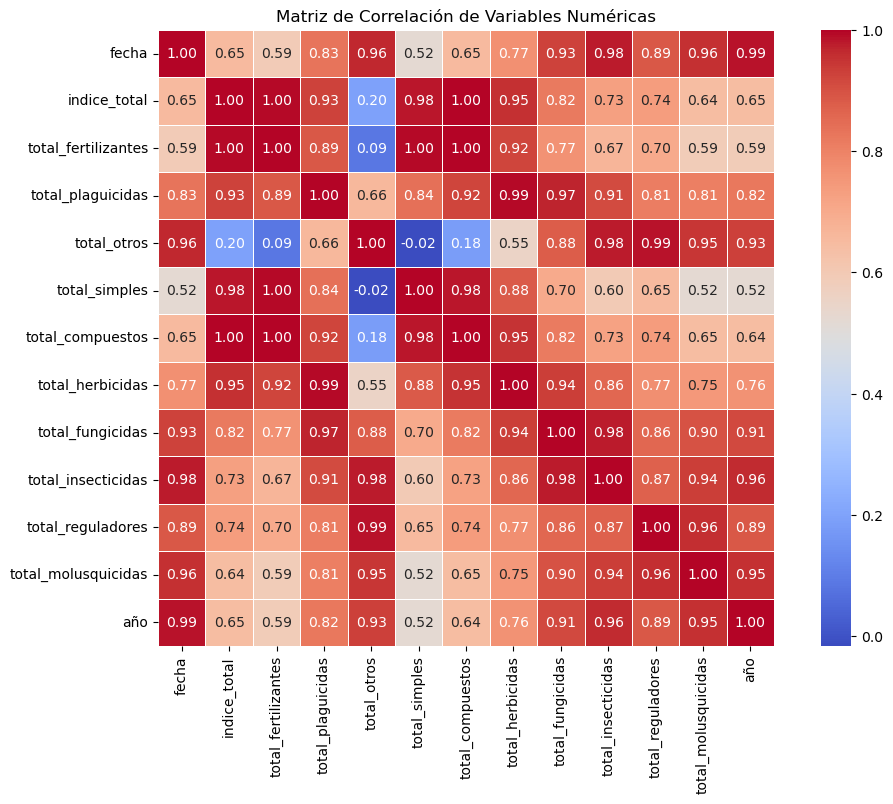

In [18]:
# Realizamos una matriz de correlación de los indices de precio totales de cada uno de los tipos de insumos agrícolas

correlation_matrix = data2.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True, linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

Esta matriz de correlación con valores tan cercanos a 1 nos indica que existen muchas relaciones directamente proporcionales entre los índices de precios de los insumos del sector agrícola. Por ejemplo, los precios de los fertilizantes también muestran una alta correlación con los precios de los plaguicidas, herbicidas, fungicidas e insecticidas. Esto indica que los precios de estos insumos tienden a moverse en la misma dirección, posiblemente debido a factores comunes como la inflación, los costos de transporte o las regulaciones del mercado. De manera similar, los precios de los fertilizantes compuestos, simples, nitrogenados, fosfatados y potásicos están muy correlacionados entre sí. Esto sugiere que los factores que influyen en el precio de un tipo de fertilizante, como los costos de producción, la demanda global o las políticas gubernamentales, suelen afectar de manera similar a los otros tipos.

## **EDA para base de datos #3: Exportaciones: Valor de las exportaciones por país de destino, producto, aduana de salida, actividad económica y partida arancelaria en valor FOB $US.**


In [19]:
data_exporta = pd.read_csv("exportations_2018_2024_complete.csv")
data_exporta.head()

/tmp/ipykernel_1195141/2296420480.py:1: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.



,Unnamed: 0,anio,mes,Codigo_depto_origen,Departamento_origen,Codigo_pais_destino,Pais_destino,Codigo_partida,nombre_partida,Codigo_ciiu_rev4,Descripcion_ciiu_rev4,Codigo_capitulo,nombre_capitulo,Nivel_tecnologico,Codigo_unidad,unidad,Dolares_fob,Kilogramos_netos,Cantidad
0,0,2018,1,0,Sin definir,27,Aruba,2710,"Aceites de petróleo o de mineral bituminoso, e...",1921,Fabricación de productos de la refinación del ...,27,Combustibles y aceites minerales y sus productos,Manufacturas basadas en recursos naturales,M3,NaN,9.276734e+06,2.763232e+07,26801.96
1,1,2018,1,0,Sin definir,98,Otros,2710,"Aceites de petróleo o de mineral bituminoso, e...",1921,Fabricación de productos de la refinación del ...,27,Combustibles y aceites minerales y sus productos,Manufacturas basadas en recursos naturales,M3,NaN,1.727741e+07,5.091398e+07,49384.00
2,2,2018,1,0,Sin definir,215,China,2709,Aceites crudos de petróleo o de mineral bitumi...,610,Extracción de petróleo crudo,27,Combustibles y aceites minerales y sus productos,Bienes primarios,M3,NaN,1.744907e+08,4.193272e+08,453557.99
3,3,2018,1,0,Sin definir,249,Estados Unidos,2709,Aceites crudos de petróleo o de mineral bitumi...,610,Extracción de petróleo crudo,27,Combustibles y aceites minerales y sus productos,Bienes primarios,M3,NaN,4.032392e+08,9.777173e+08,1057531.13
4,4,2018,1,0,Sin definir,249,Estados Unidos,2710,"Aceites de petróleo o de mineral bituminoso, e...",1921,Fabricación de productos de la refinación del ...,27,Combustibles y aceites minerales y sus productos,Manufacturas basadas en recursos naturales,M3,NaN,5.691462e+07,1.330066e+08,147998.81


In [20]:
data_exporta.shape

(982634, 19)

In [21]:
filtros = ["Abonos", "Aceites esenciales, perfumería, cosméticos", "Algodón", "Animales vivos", "Azúcares y artículos confitería",
           "Bebidas, líquidos alcohólicos y vinagre", "Cacao y sus preparaciones", "Café, té, yerba mate y especias", "Carnes y despojos comestibles",
           "Cereales", "Demás fibras vegetales, hilados de papel", "Demás productos de origen animal", "Frutos comestibles, cortezas de agrios o melones",
           "Gomas, resinas y demás jugos y extractos vegetales", "Grasas y aceites animales o vegetales", "Leche y productos lácteos, huevos, miel",
           "Legumbres y hortalizas, plantas, raíces y tubérculos", "Madera, carbón vegetal y manufacturas de madera", "Manufacturas de cuero, artículos de viaje, bolsos",
           "Materias trenzables y demás productos vegetales", "Pescados y crustáceos, moluscos e invertebrados acuáticos", "Pieles y cueros",
           "Plantas vivas y productos de la floricultura", "Preparaciones a base de cereal, harina, leche; pastelería", "Preparaciones alimenticias diversas",
           "Preparaciones de carne, pescado, crustáceos, moluscos", "Preparaciones de legumbre u hortalizas, frutos, otras", "Productos de molinería, malta, almidón y fécula",
           "Productos químicos orgánicos", "Semillas y frutos oleaginosos, forrajes"]

In [22]:
filtered_df = data_exporta[data_exporta['nombre_capitulo'].isin(filtros)].reset_index(drop=True)

In [23]:
filtered_df.columns=filtered_df.columns.str.strip().str.lower().str.replace(" ", "_")
string_type_cols = filtered_df.dtypes[filtered_df.dtypes == "object"].index.tolist()
for col in string_type_cols:
  filtered_df[col] = filtered_df[col].str.strip().str.lower().str.replace(" ", "_")

filtered_df.head()

,unnamed:_0,anio,mes,codigo_depto_origen,departamento_origen,codigo_pais_destino,pais_destino,codigo_partida,nombre_partida,codigo_ciiu_rev4,descripcion_ciiu_rev4,codigo_capitulo,nombre_capitulo,nivel_tecnologico,codigo_unidad,unidad,dolares_fob,kilogramos_netos,cantidad
0,9,2018,1,5,antioquia,17,albania,803,"bananas_o_plátanos,_frescos_o_secos",NaN,cultivo_de_plátano_y_banano,8,"frutos_comestibles,_cortezas_de_agrios_o_melones",bienes_primarios,kg,kilogramo,72576.00,168480.0,168480.0
1,15,2018,1,5,antioquia,23,alemania,511,productos_de_origen_animal_no_expresados_ni_co...,NaN,procesamiento_y_conservación_de_carne_y_produc...,5,demás_productos_de_origen_animal,bienes_primarios,kg,kilogramo,14850.00,33000.0,33000.0
2,16,2018,1,5,antioquia,23,alemania,603,"flores_y_capullos,_cortados_para_ramos_o_adorn...",NaN,cultivo_de_flor_de_corte,6,plantas_vivas_y_productos_de_la_floricultura,bienes_primarios,u,unidades_o_artículos,1625.10,334.0,3060.0
3,17,2018,1,5,antioquia,23,alemania,803,"bananas_o_plátanos,_frescos_o_secos",NaN,cultivo_de_plátano_y_banano,8,"frutos_comestibles,_cortezas_de_agrios_o_melones",bienes_primarios,kg,kilogramo,4730443.55,13466579.0,13466579.0
4,18,2018,1,5,antioquia,23,alemania,804,"dátiles,_higos,_piñas_(ananás),__aguacates_(pa...",NaN,cultivo_de_frutas_tropicales_y_subtropicales,8,"frutos_comestibles,_cortezas_de_agrios_o_melones",bienes_primarios,kg,kilogramo,210805.38,109190.0,109190.0


In [24]:
filtered_df.to_csv("exportaciones_2018_2024_agricultura.csv")

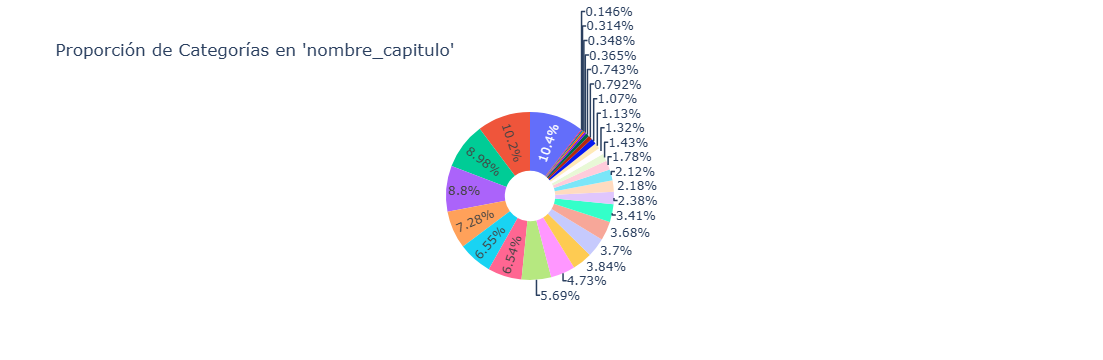

In [25]:
# Proporcion de las 27 categorias de `nombre_capitulo` que exportamos

conteo_categorias = filtered_df['nombre_capitulo'].value_counts()
fig = px.pie(
    names=conteo_categorias.index,
    values=conteo_categorias.values,
    title="Proporción de Categorías en 'nombre_capitulo'",
    hole=0.3  # Hacerlo un gráfico tipo donut
)

fig.update_layout(showlegend=False)
fig.show()

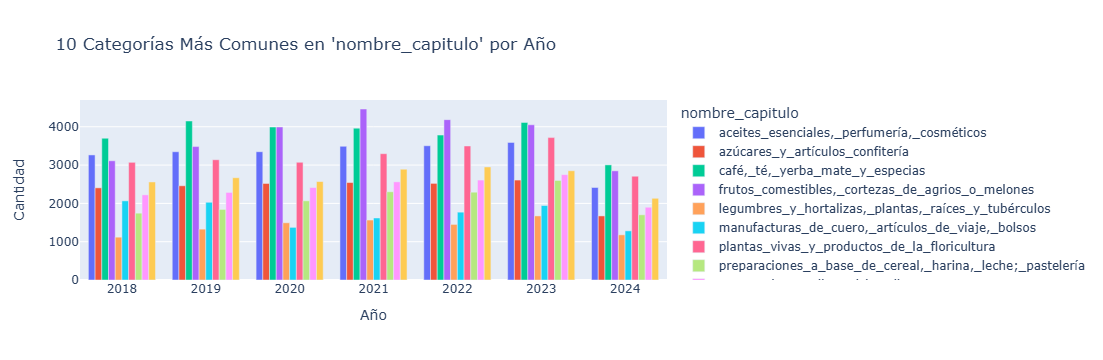

In [26]:
# TOP 10 categorias de la columa nombre_capitulo que más exportamos por año

top_10_categorias = filtered_df['nombre_capitulo'].value_counts().nlargest(10).index
nombre_capitulo_filtrado = filtered_df[filtered_df['nombre_capitulo'].isin(top_10_categorias)]
conteo_anual = nombre_capitulo_filtrado.groupby(['anio', 'nombre_capitulo']).size().reset_index(name='conteo')

fig = px.bar(
    conteo_anual,
    x='anio',
    y='conteo',
    color='nombre_capitulo',
    title="10 Categorías Más Comunes en 'nombre_capitulo' por Año",
    labels={'anio': 'Año', 'conteo': 'Cantidad'},
    barmode='group'
)
fig.show()

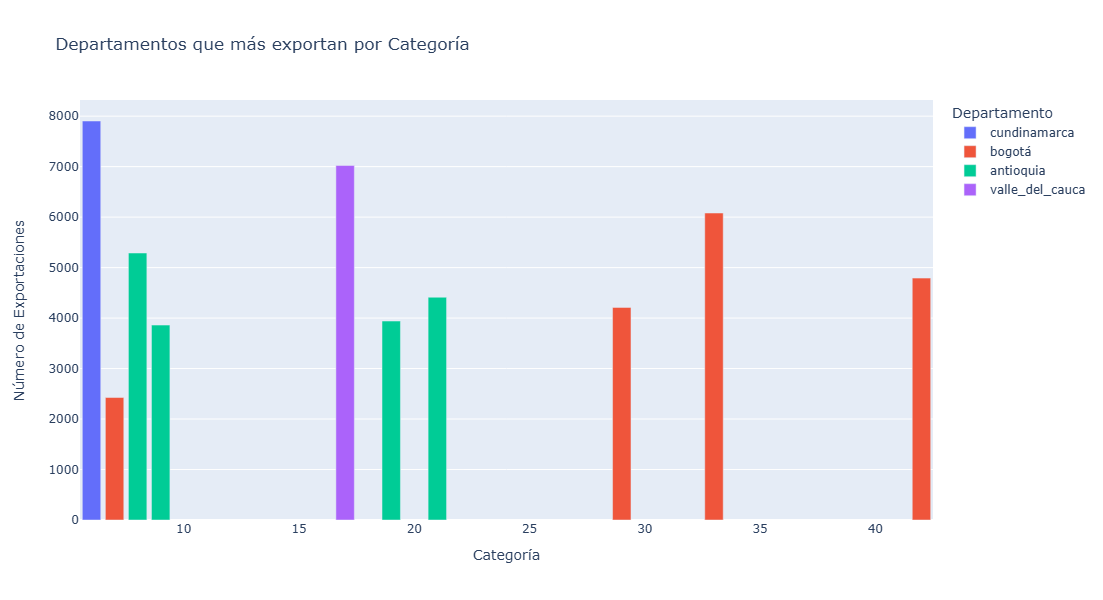

In [27]:
# ¿Cuáles son los departamentos que más exportan esas 10 categorías?

top_10_categorias_code = filtered_df['codigo_capitulo'].value_counts().nlargest(10).index
codigo_capitulo_filtrado = filtered_df[filtered_df['codigo_capitulo'].isin(top_10_categorias_code)]
conteo_por_categoria_dpto = codigo_capitulo_filtrado.groupby(['codigo_capitulo', 'departamento_origen']).size().reset_index(name='conteo')
departamento_top_exportador = conteo_por_categoria_dpto.loc[conteo_por_categoria_dpto.groupby('codigo_capitulo')['conteo'].idxmax()]
df_top_exportadores = departamento_top_exportador[['codigo_capitulo', 'departamento_origen', 'conteo']]

fig = px.bar(
    df_top_exportadores,
    x='codigo_capitulo',
    y='conteo',
    color='departamento_origen',
    title="Departamentos que más exportan por Categoría",
    labels={'codigo_capitulo': 'Categoría', 'conteo': 'Número de Exportaciones', 'departamento_origen': 'Departamento'},
)
fig.update_layout(
    height=600,
)
fig.show()


Cata una de las $27$ categorías de la feature `nombre_capitulo` tiene asignado un código en la columna `codigo_capitulo`. La gráfica que está arriba es la gráfica de las 10 categorías más exportadas y cuáles son los departamentos que más las exportan, donde:

* La categoría 6 es: `plantas_vivas_y_productos_de_la_floricultura`
* La categoría 7 es: `legumbres_y_hortalizas,_plantas,_raíces_y_tubérculos `
* La categoría 8 es: `frutos_comestibles,_cortezas_de_agrios_o_melones`
* La categoría 9 es: `café,_té,_yerba_mate_y_especias`
* La categoría 17 es: `azúcares_y_artículos_confitería `
* La categoría 19 es: `preparaciones_a_base_de_cereal,_harina,_leche;_pastelería`
* La categoría 21 es: `preparaciones_alimenticias_diversas`
* La categoría 29 es: `productos_químicos_orgánicos`
* La categoría 33 es: `aceites_esenciales,_perfumería,_cosméticos`
* La categoría 42 es: `manufacturas_de_cuero,_artículos_de_viaje,_bolsos `

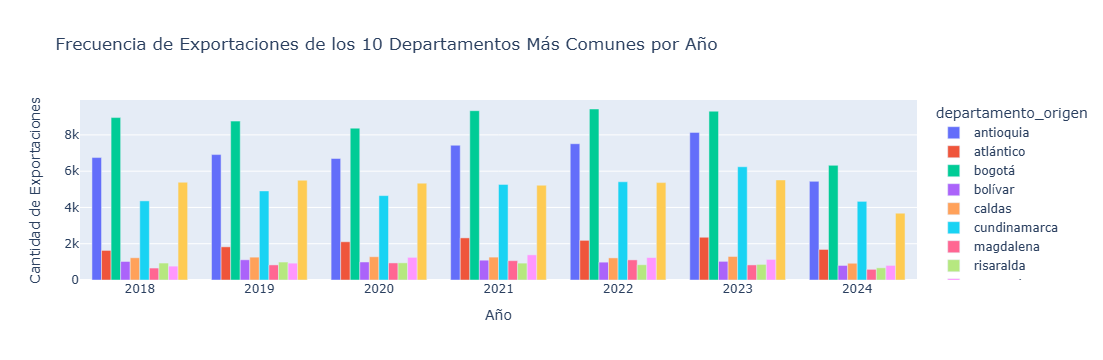

In [28]:
# TOP 10 de departamentos que más exportan de manera general

top_10_departamentos = filtered_df['departamento_origen'].value_counts().nlargest(10).index
dpto_filtrado = filtered_df[filtered_df['departamento_origen'].isin(top_10_departamentos)]

conteo_anual = dpto_filtrado.groupby(['anio', 'departamento_origen']).size().reset_index(name='conteo')
fig = px.bar(
    conteo_anual,
    x='anio',
    y='conteo',
    color='departamento_origen',
    title="Frecuencia de Exportaciones de los 10 Departamentos Más Comunes por Año",
    labels={'anio': 'Año', 'conteo': 'Cantidad de Exportaciones'},
    barmode='group'
)

fig.show()

Text(0.5, 1.0, 'Distribución en escala logarítmica de dolares_fob')

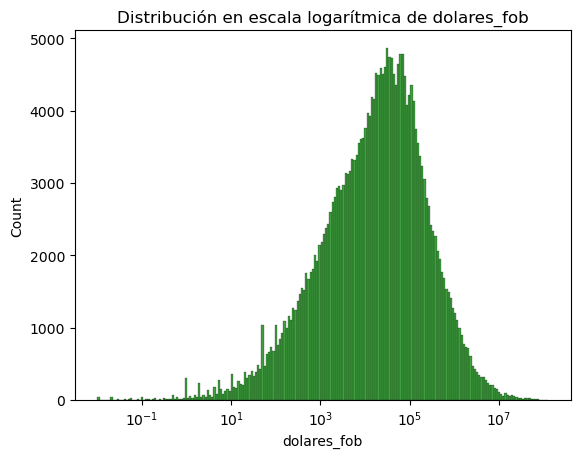

In [29]:
# Distribucion en escala logarítimica de la variable `dolares_fob`

sns.histplot(filtered_df.dolares_fob, log_scale=True, color="green")
plt.title("Distribución en escala logarítmica de dolares_fob")

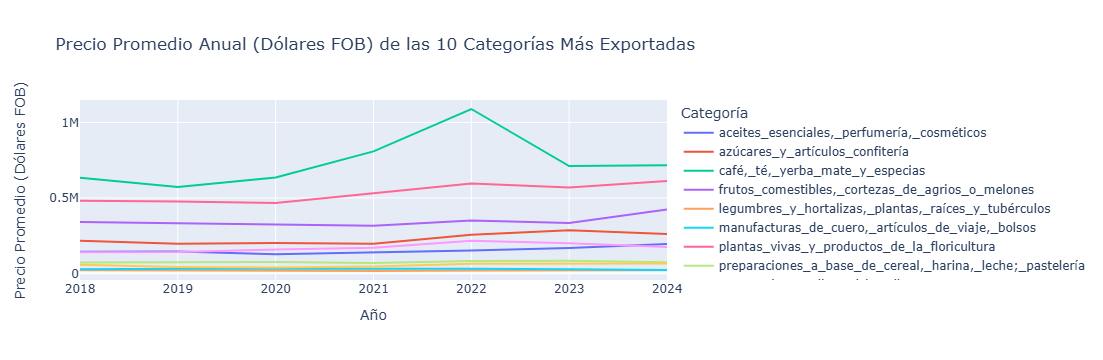

In [30]:
# TOP 10 Productos mas caros que se exportan

df_top_10 = filtered_df[filtered_df['nombre_capitulo'].isin(top_10_categorias)]
precio_promedio_anual = df_top_10.groupby(['anio', 'nombre_capitulo'])['dolares_fob'].mean().reset_index()

fig = px.line(
    precio_promedio_anual,
    x='anio',
    y='dolares_fob',
    color='nombre_capitulo',
    title='Precio Promedio Anual (Dólares FOB) de las 10 Categorías Más Exportadas',
    labels={'anio': 'Año', 'dolares_fob': 'Precio Promedio (Dólares FOB)', 'nombre_capitulo': 'Categoría'}
)
fig.show()


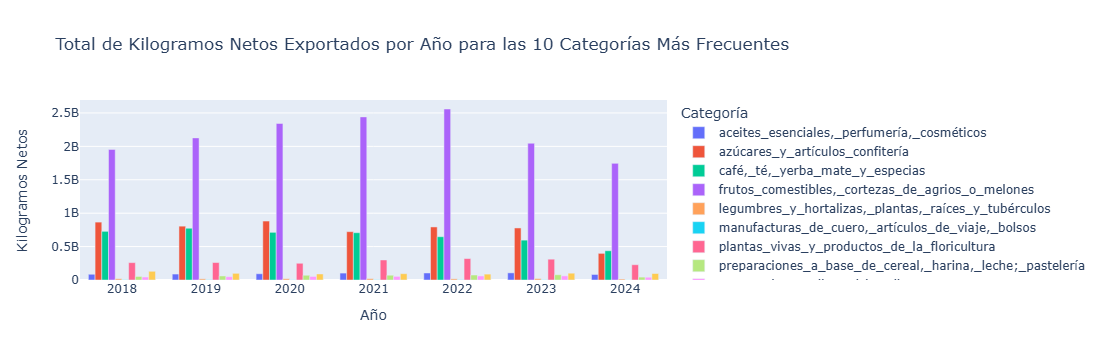

In [31]:
# Kg netos de las 10 categorías de `nombre_capitulo` que más exportamos

top_10_kg = filtered_df[filtered_df['nombre_capitulo'].isin(top_10_categorias)]
kg_netos_anual = top_10_kg.groupby(['anio', 'nombre_capitulo'])['kilogramos_netos'].sum().reset_index()

fig = px.bar(
    kg_netos_anual,
    x='anio',
    y='kilogramos_netos',
    color='nombre_capitulo',
    title='Total de Kilogramos Netos Exportados por Año para las 10 Categorías Más Frecuentes',
    labels={'anio': 'Año', 'kilogramos_netos': 'Kilogramos Netos', 'nombre_capitulo': 'Categoría'},
    barmode='group'
)
fig.show()

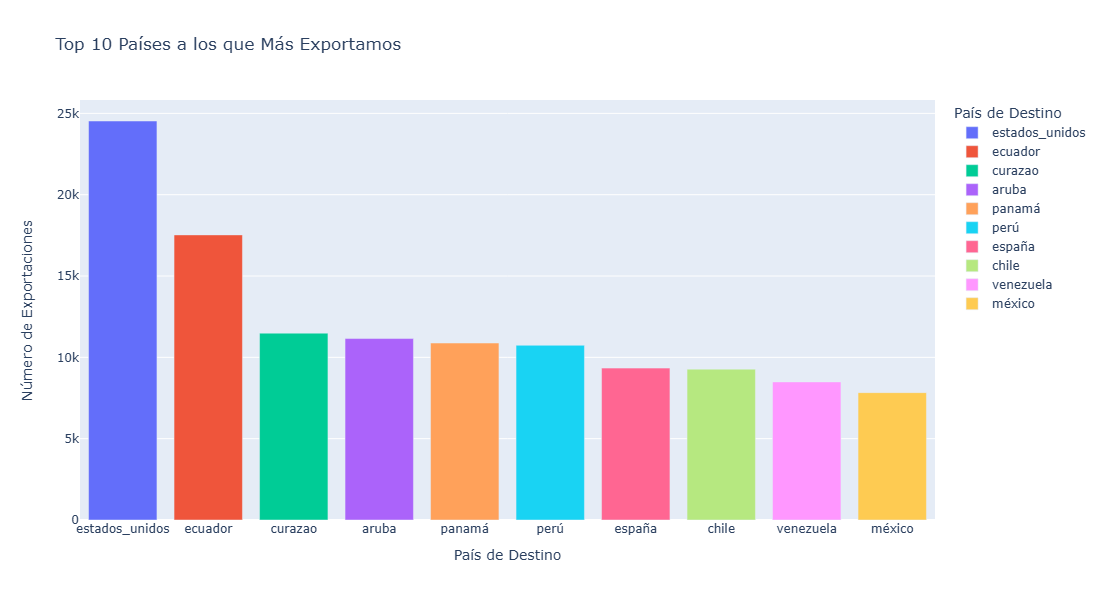

In [32]:
# Paises a los que mas exportamos

top_10_paises = filtered_df['pais_destino'].value_counts().nlargest(10).index
paises_filtrados = filtered_df[filtered_df['pais_destino'].isin(top_10_paises)]
conteo_paises = paises_filtrados['pais_destino'].value_counts().reset_index(name='conteo')
conteo_paises.columns = ['pais_destino', 'conteo']

fig = px.bar(
    conteo_paises,
    x='pais_destino',
    y='conteo',
    title="Top 10 Países a los que Más Exportamos",
    labels={'pais_destino': 'País de Destino', 'conteo': 'Número de Exportaciones'},
    color='pais_destino'
)

fig.update_layout(
    height=600
)
fig.show()

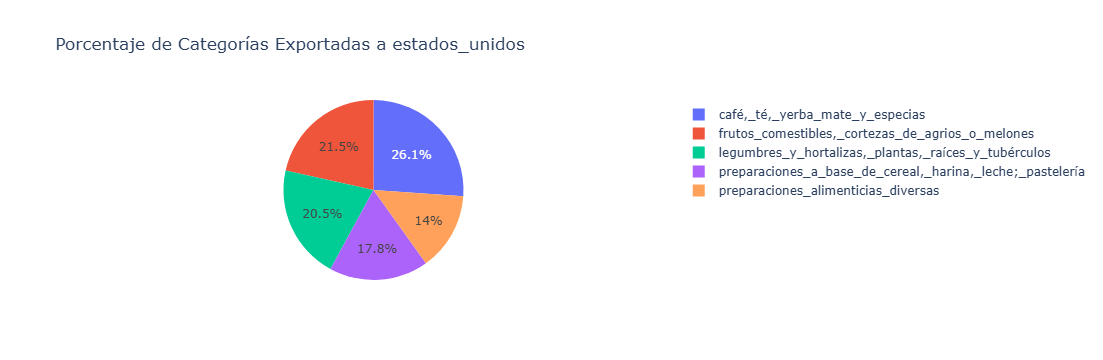

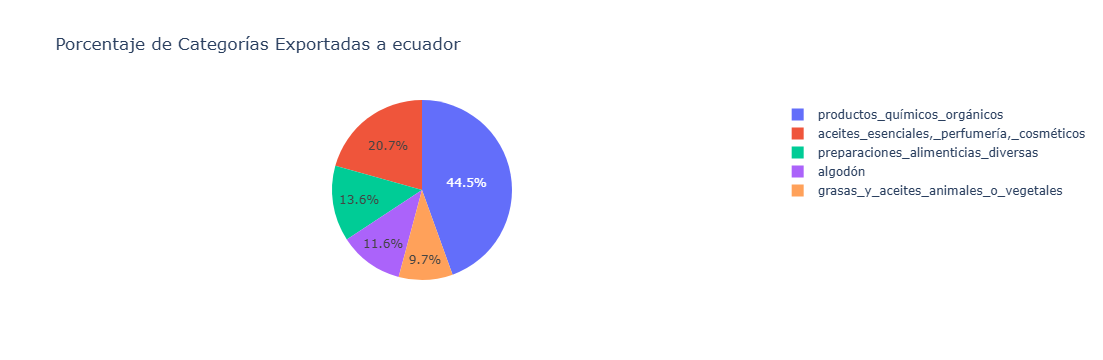

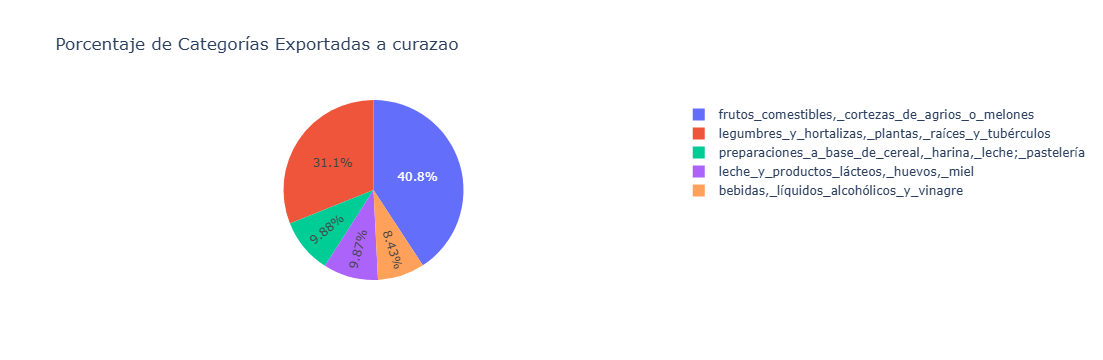

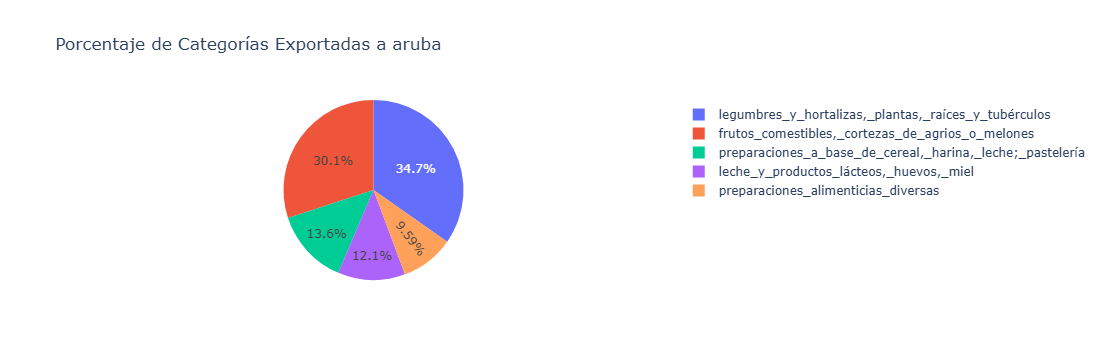

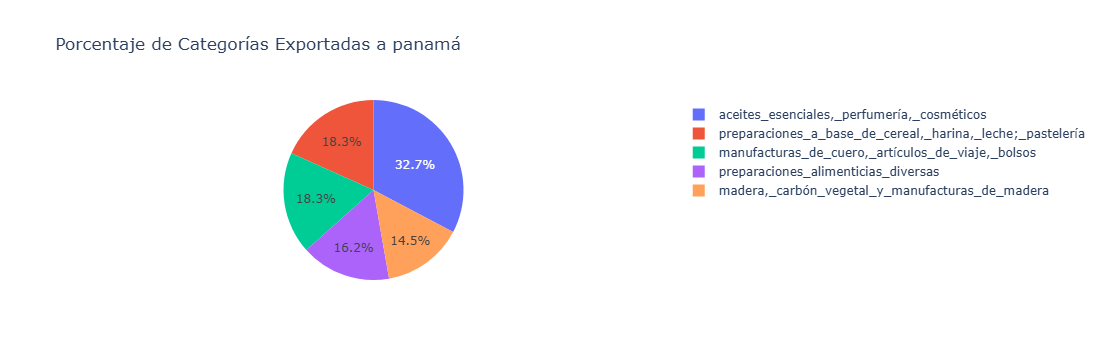

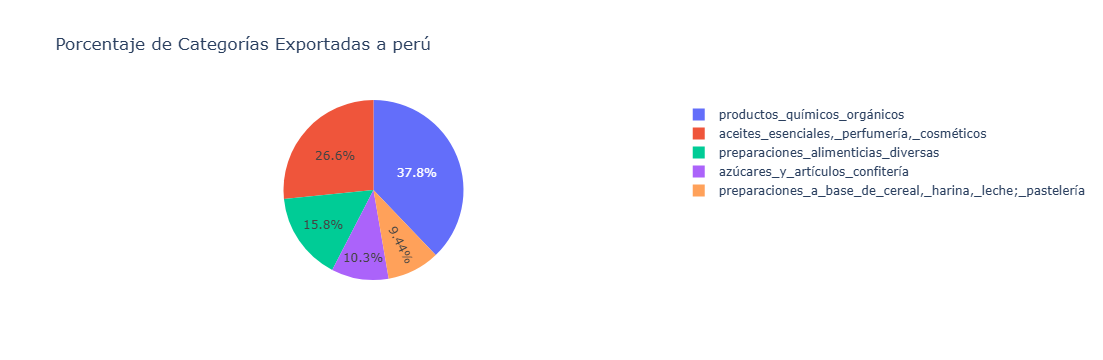

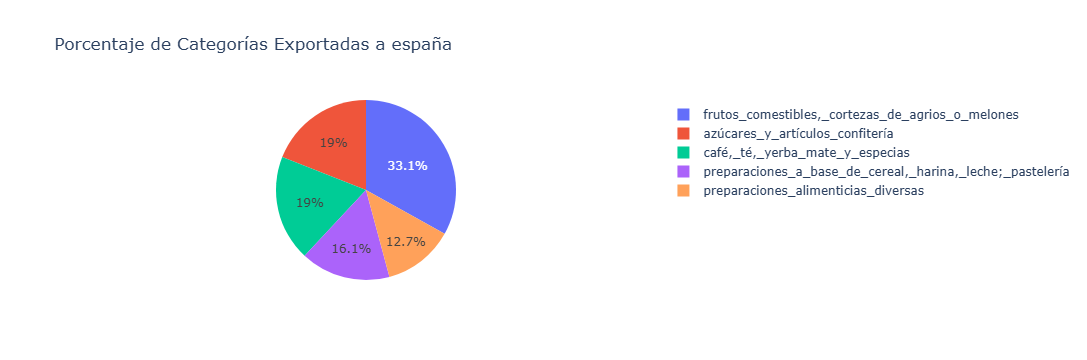

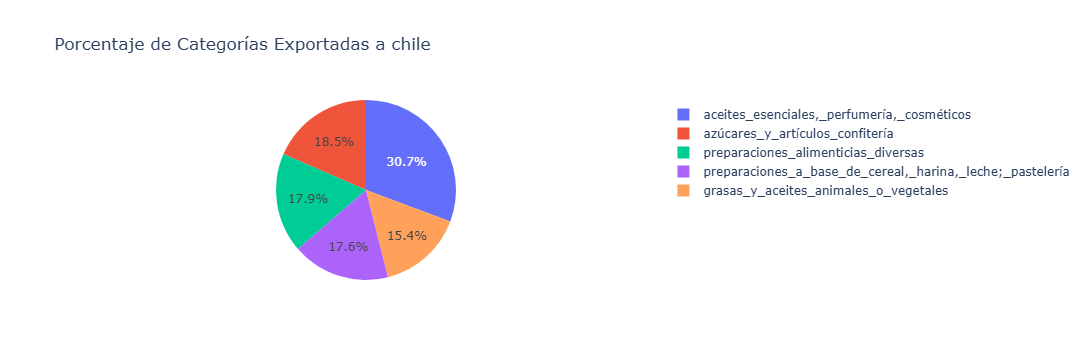

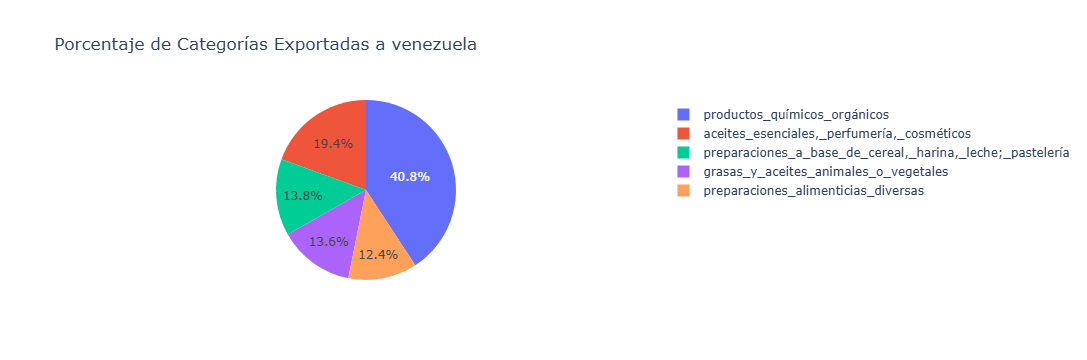

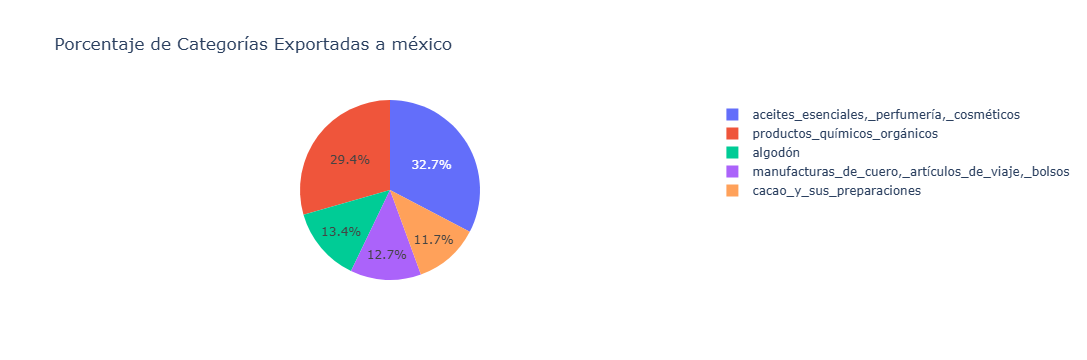

In [33]:
# ¿Qué es lo que más exportamos a estos países?

for pais in top_10_paises:
    pais_df = filtered_df[filtered_df['pais_destino'] == pais]
    categorias_exportadas = pais_df['nombre_capitulo'].value_counts().head(5).reset_index(name='conteo')
    categorias_exportadas.columns = ['nombre_capitulo', 'conteo']
    
    fig = px.pie(
        categorias_exportadas,
        names='nombre_capitulo',
        values='conteo',
        title=f"Porcentaje de Categorías Exportadas a {pais}",
        labels={'nombre_capitulo': 'Categoría', 'conteo': 'Número de Exportaciones'},
        color='nombre_capitulo',
    )
    
    fig.show()

In [34]:
# Matriz de correlación exportaciones 



## **EDA para base de datos #4: Importaciones desagregadas por país de origen, producto, actividad económica y partida arancelaria en valor CIF $US:**

En este caso, el análisis exploratorio de datos será exactamente igual al de las exportaciones: ambas bases de datos cuentan con las mismas columnas y una cantidad de información parecida. Por tanto, el código que explicamos a detalle para las exportaciones, lo aplicaremos todo a las importaciones

In [35]:
datos_impor = pd.read_csv("importations_2018_2024_complete.csv")
Normalize_Columns(datos_impor)
datos_impor.head()

,unnamed:_0,periodo,mes,codigo_departamento_destino,departamento_destino,codigo_pais_origen,pais_de_origen,codigo_partida,nombre_partida,codigo_ciiu_rev4,...,codigo_capitulo,nombre_capitulo,nivel_tecnologico,codigo_uso_economico,uso_economico,detalle_uso_economico,dolares_cif,dolares_fob,kilogramos_netos,cantidad
0,0,2018,1,0,sin_definir,105,brasil,8412,los_demás_motores_y_máquinas_motrices.,2812,...,84,"reactores_nucleares,_calderas,_máquinas_y_partes",manufacturas_de_alta_tecnología,84,bienes_de_capital,maquinaria_industrial,101.82,98.01,4.87,9.0
1,1,2018,1,0,sin_definir,105,brasil,8413,"bombas_para_líqu_idos,_incluso_con_dispositivo...",2813,...,84,"reactores_nucleares,_calderas,_máquinas_y_partes",manufacturas_de_tecnología_media,83,bienes_de_capital,partes_maquinaria_industrial,161.82,155.76,7.73,28.0
2,2,2018,1,0,sin_definir,105,brasil,8421,"centrifugadoras,_incluidas_las_secadoras_centr...",2819,...,84,"reactores_nucleares,_calderas,_máquinas_y_partes",manufacturas_de_tecnología_media,84,bienes_de_capital,maquinaria_industrial,1346.49,1296.00,64.33,320.0
3,3,2018,1,0,sin_definir,249,estados_unidos,8481,artículos_de_grifería_y_órganos_similares_para...,2813,...,84,"reactores_nucleares,_calderas,_máquinas_y_partes",manufacturas_de_tecnología_media,53,materias_primas,productos_míneros,1909.50,1882.57,29.00,180.0
4,4,2018,1,0,sin_definir,249,estados_unidos,9026,instrumentos_y_aparatos_para_la_medida_o_contr...,2651,...,90,"instrumentos_y_aparatos_de_óptica,_fotografía,...",manufacturas_de_alta_tecnología,81,bienes_de_capital,aparatos_de_oficina,2208.54,2177.39,33.54,60.0


In [36]:
pattern = '|'.join(filtros)

filtered_df_impor = datos_impor[
    datos_impor['nombre_partida'].str.contains(pattern, case=False, na=False) |
    datos_impor['descripcion_ciiu_rev4'].str.contains(pattern, case=False, na=False) |
    datos_impor['nombre_capitulo'].str.contains(pattern, case=False, na=False)
]

In [37]:
palabras_clave = []
for frase in filtros:
    palabras = frase.replace(",", "").replace(";", "").lower().split()
    palabras_clave.extend([palabra for palabra in palabras if len(palabra) > 1])

palabras_clave = list(set(palabras_clave))
categorias_excluir = [
    'productos_químicos_inorgánicos', 'manufacturas_de_piedra,_yeso,_cemento,_mica_y_análogas', 
    'aparatos_y_material_eléctrico,_de_grabación_o_imagen', 'plomo_y_manufacturas', 'estaño_y_manufacturas', 
    'demás_metales_comunes,_"cermets"_y_manufacturas', 'minerales,_escorias_y_cenizas', 
    'perlas_finas,_piedras_y_metales_preciosos', 'níquel_y_sus_manufacturas', 'fundición,_hierro_y_acero', 
    'zinc_y_manufacturas', 'corcho_y_sus_manufacturas', 'productos_diversos_de_las_industrias_químicas', 
    'extractos_curtientes,_pinturas,_tintas', 'productos_cerámicos', 'cobre_y_sus_manufacturas', 
    'combustibles_y_aceites_minerales_y_sus_productos', 'materias_albuminoideas,_colas', 
    'aluminio_y_sus_manufacturas', 'sal;_azufre;_tierras_y_piedras;_yesos,_cales_y_cementos', 
    'vidrio_y_manufacturas', 'papel,_cartón_y_sus_manufacturas', 'caucho_y_manufacturas'
]

filtered_df_impor = datos_impor[
    (datos_impor["nivel_tecnologico"] == "manufacturas_basadas_en_recursos_naturales") | 
    (datos_impor["nivel_tecnologico"] == "bienes_primarios")
]

filtered_agriculture_df = filtered_df_impor[
    filtered_df_impor[['nombre_partida', 'descripcion_ciiu_rev4', 'nombre_capitulo']].apply(
        lambda row: any(palabra in str(row[col]).lower() for col in row.index for palabra in palabras_clave), axis=1
    ) & ~filtered_df_impor['nombre_capitulo'].isin(categorias_excluir)
]


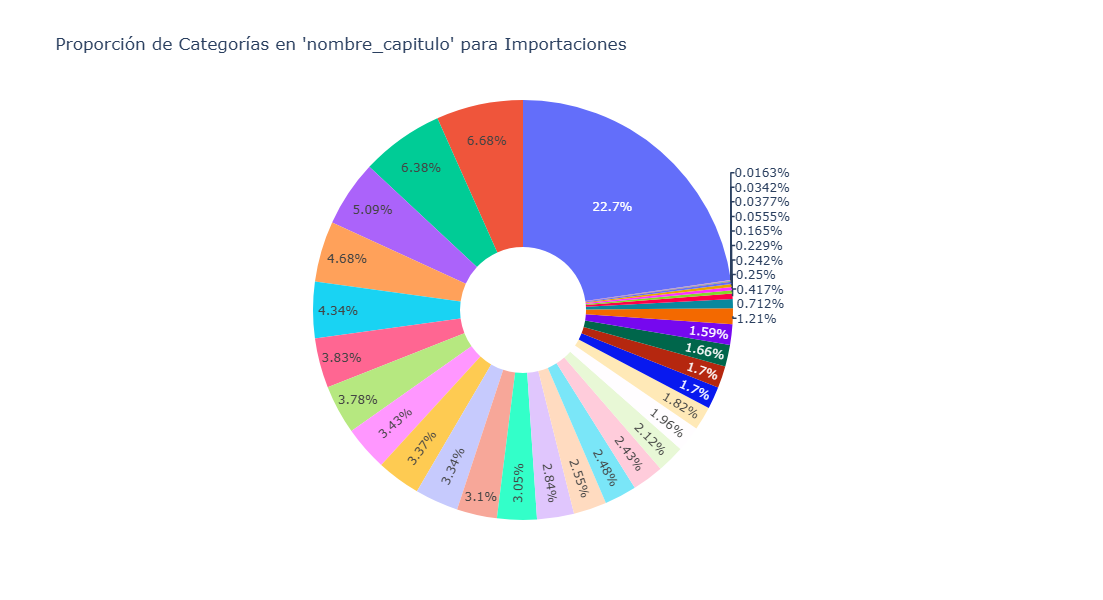

In [38]:
# =============Conteo de categorías de `nombre_capitulo`==========================
conteo_categorias = filtered_agriculture_df['nombre_capitulo'].value_counts()

fig = px.pie(
    names=conteo_categorias.index,
    values=conteo_categorias.values,
    title="Proporción de Categorías en 'nombre_capitulo' para Importaciones",
    hole=0.3
)
fig.update_layout(
    showlegend=False,
    width=600,  
    height=600 
)
fig.show()

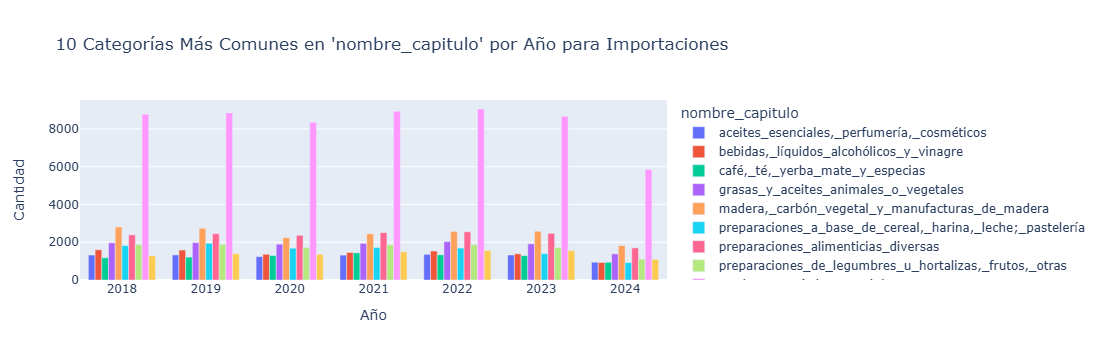

In [39]:
#===========TOP 10 categorias de la columa nombre_capitulo que más importamos por año================================

top_10_categorias = filtered_agriculture_df['nombre_capitulo'].value_counts().nlargest(10).index
nombre_capitulo_filtrado = filtered_agriculture_df[filtered_agriculture_df['nombre_capitulo'].isin(top_10_categorias)]
conteo_anual = nombre_capitulo_filtrado.groupby(['periodo', 'nombre_capitulo']).size().reset_index(name='conteo')

fig = px.bar(
    conteo_anual,
    x='periodo',
    y='conteo',
    color='nombre_capitulo',
    title="10 Categorías Más Comunes en 'nombre_capitulo' por Año para Importaciones",
    labels={'periodo': 'Año', 'conteo': 'Cantidad'},
    barmode='group'
)
fig.show()

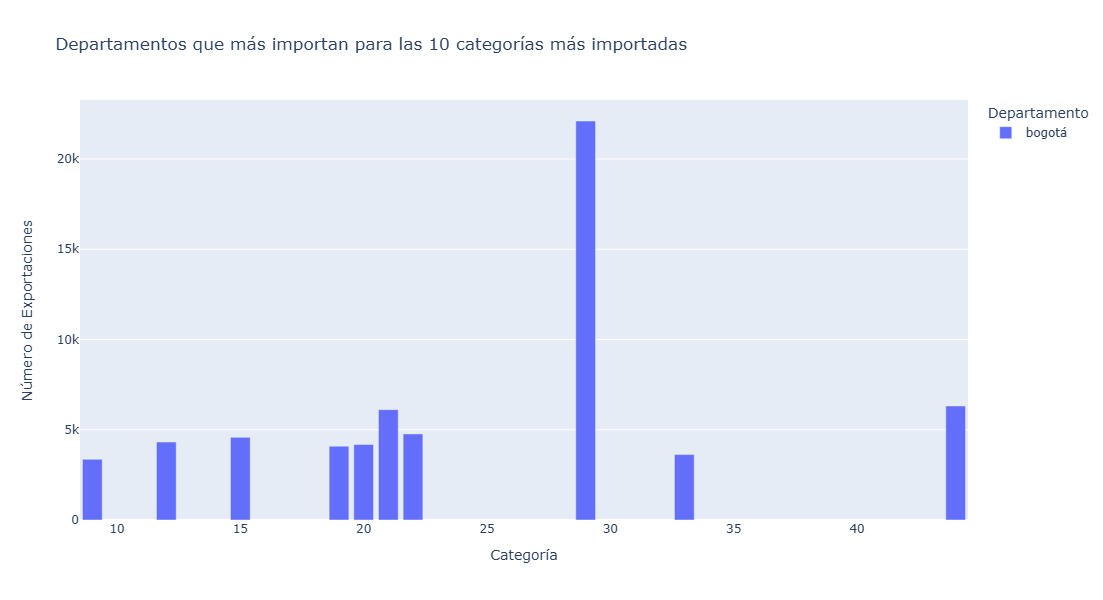

In [40]:
# ======================¿Cuáles son los departamentos que más importan esas 10 categorías?======================================

top_10_categorias_code = filtered_agriculture_df['codigo_capitulo'].value_counts().nlargest(10).index
codigo_capitulo_filtrado = filtered_agriculture_df[filtered_agriculture_df['codigo_capitulo'].isin(top_10_categorias_code)]
conteo_por_categoria_dpto = codigo_capitulo_filtrado.groupby(['codigo_capitulo', 'departamento_destino']).size().reset_index(name='conteo')
departamento_top_exportador = conteo_por_categoria_dpto.loc[conteo_por_categoria_dpto.groupby('codigo_capitulo')['conteo'].idxmax()]
df_top_exportadores = departamento_top_exportador[['codigo_capitulo', 'departamento_destino', 'conteo']]

fig = px.bar(
    df_top_exportadores,
    x='codigo_capitulo',
    y='conteo',
    color='departamento_destino',
    title="Departamentos que más importan para las 10 categorías más importadas",
    labels={'codigo_capitulo': 'Categoría', 'conteo': 'Número de Exportaciones', 'departamento_destino': 'Departamento'},
)
fig.update_layout(
    height=600,
)
fig.show()

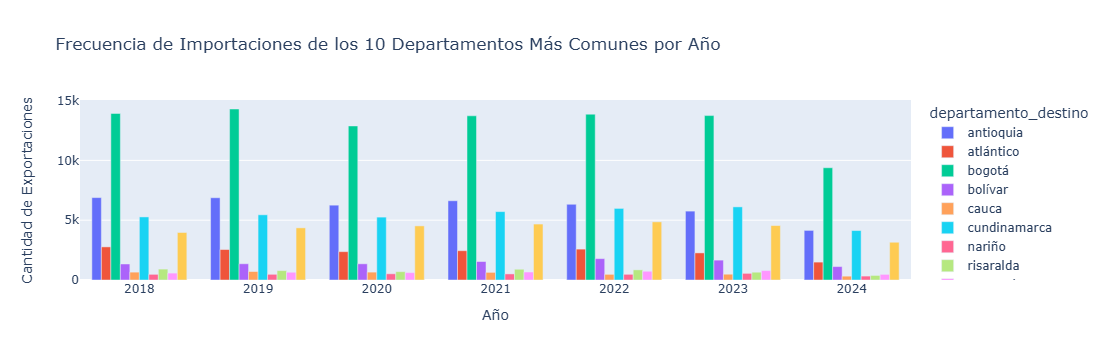

In [41]:
#===================TOP 10 de departamentos que más importan de manera general==========================================

top_10_departamentos = filtered_agriculture_df['departamento_destino'].value_counts().nlargest(10).index
dpto_filtrado = filtered_agriculture_df[filtered_agriculture_df['departamento_destino'].isin(top_10_departamentos)]

conteo_anual = dpto_filtrado.groupby(['periodo', 'departamento_destino']).size().reset_index(name='conteo')
fig = px.bar(
    conteo_anual,
    x='periodo',
    y='conteo',
    color='departamento_destino',
    title="Frecuencia de Importaciones de los 10 Departamentos Más Comunes por Año",
    labels={'periodo': 'Año', 'conteo': 'Cantidad de Exportaciones'},
    barmode='group'
)

fig.show()

Text(0.5, 1.0, 'Distribución de `dolares_fob` para las importaciones')

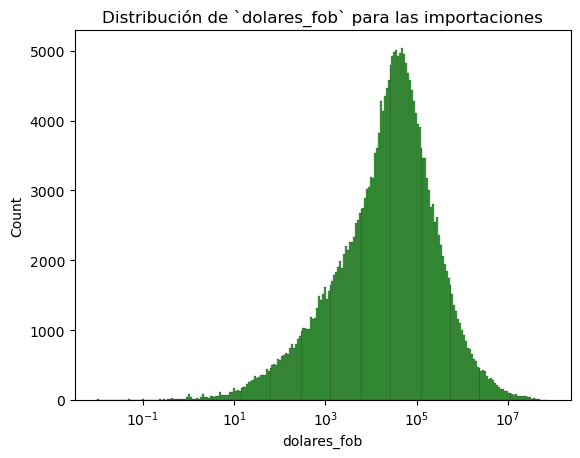

In [42]:
#=====Distribución de `dolares_fob` para las importaciones========================

sns.histplot(filtered_agriculture_df.dolares_fob, log_scale=True, color="green")
plt.title("Distribución de `dolares_fob` para las importaciones")

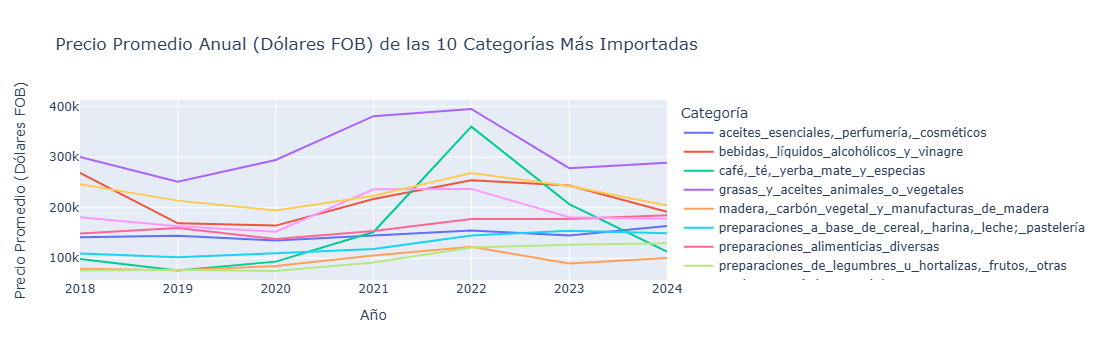

In [43]:
#=========TOP 10 Productos mas caros que se importan===============================

df_top_10 = filtered_agriculture_df[filtered_agriculture_df['nombre_capitulo'].isin(top_10_categorias)]
precio_promedio_anual = df_top_10.groupby(['periodo', 'nombre_capitulo'])['dolares_fob'].mean().reset_index()

fig = px.line(
    precio_promedio_anual,
    x='periodo',
    y='dolares_fob',
    color='nombre_capitulo',
    title='Precio Promedio Anual (Dólares FOB) de las 10 Categorías Más Importadas',
    labels={'periodo': 'Año', 'dolares_fob': 'Precio Promedio (Dólares FOB)', 'nombre_capitulo': 'Categoría'}
)
fig.show()

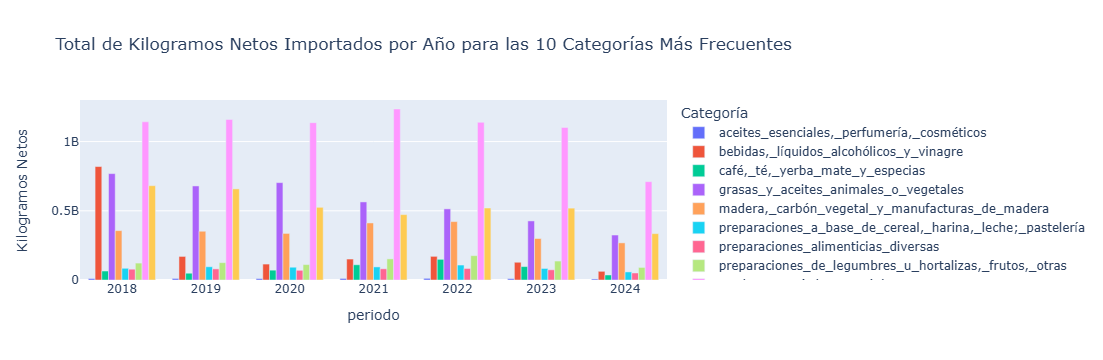

In [44]:
#=========Kg netos de las 10 categorías de `nombre_capitulo` que más exportamos==========================

top_10_kg = filtered_agriculture_df[filtered_agriculture_df['nombre_capitulo'].isin(top_10_categorias)]
kg_netos_anual = top_10_kg.groupby(['periodo', 'nombre_capitulo'])['kilogramos_netos'].sum().reset_index()

fig = px.bar(
    kg_netos_anual,
    x='periodo',
    y='kilogramos_netos',
    color='nombre_capitulo',
    title='Total de Kilogramos Netos Importados por Año para las 10 Categorías Más Frecuentes',
    labels={'Periodo': 'Año', 'kilogramos_netos': 'Kilogramos Netos', 'nombre_capitulo': 'Categoría'},
    barmode='group'
)
fig.show()

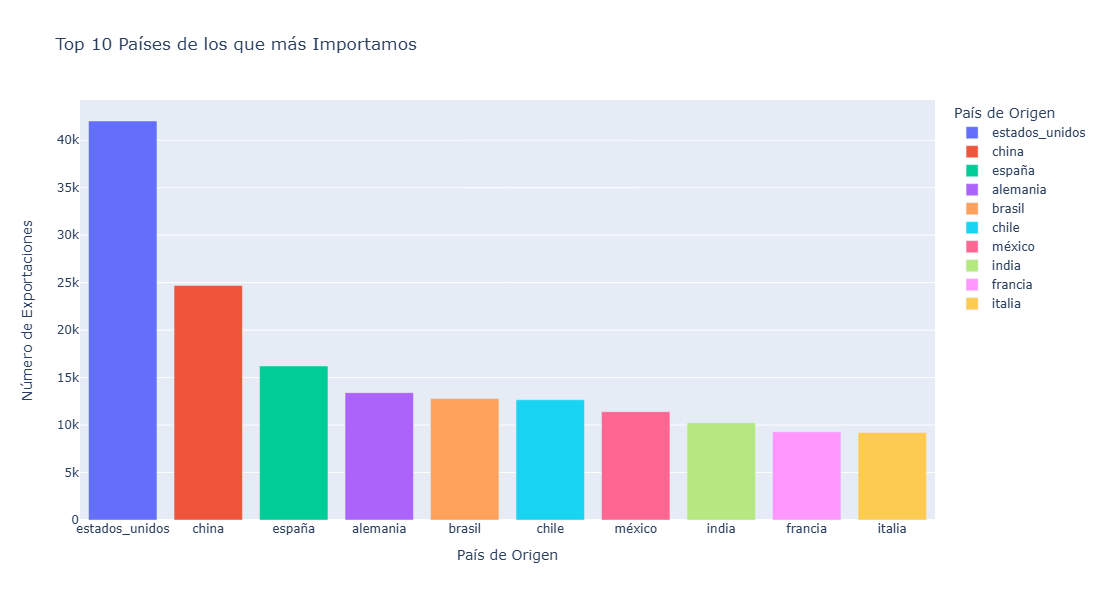

In [45]:
#=====================Paises de los que mas importamos==================================================

top_10_paises = filtered_agriculture_df['pais_de_origen'].value_counts().nlargest(10).index
paises_filtrados = filtered_agriculture_df[filtered_agriculture_df['pais_de_origen'].isin(top_10_paises)]
conteo_paises = paises_filtrados['pais_de_origen'].value_counts().reset_index(name='conteo')
conteo_paises.columns = ['pais_de_origen', 'conteo']

fig = px.bar(
    conteo_paises,
    x='pais_de_origen',
    y='conteo',
    title="Top 10 Países de los que más Importamos",
    labels={'pais_de_origen': 'País de Origen', 'conteo': 'Número de Exportaciones'},
    color='pais_de_origen'
)

fig.update_layout(
    height=600
)
fig.show()

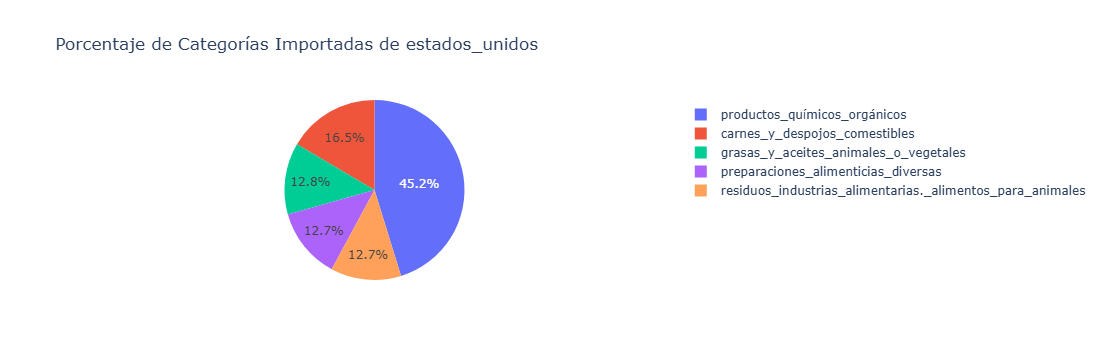

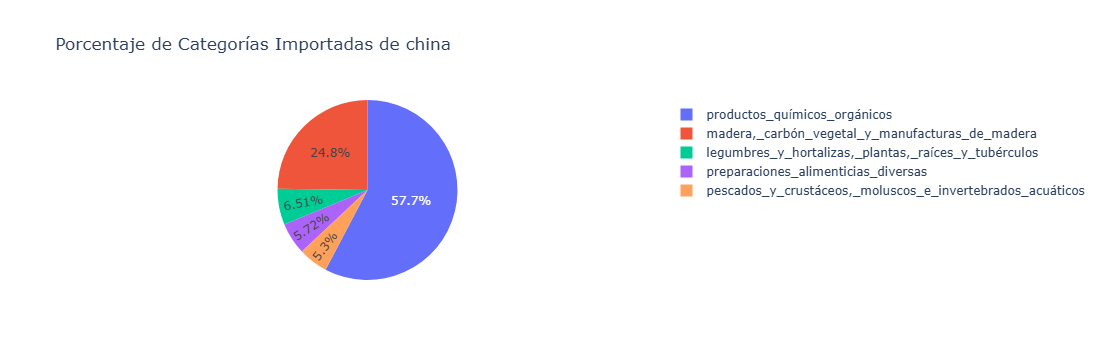

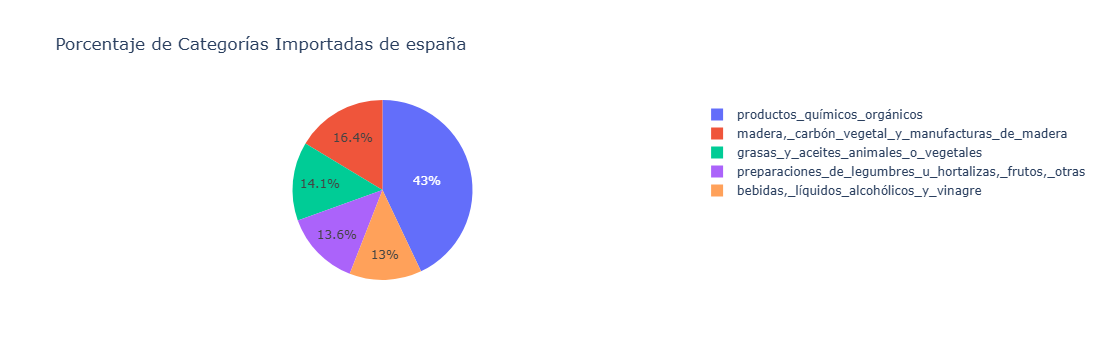

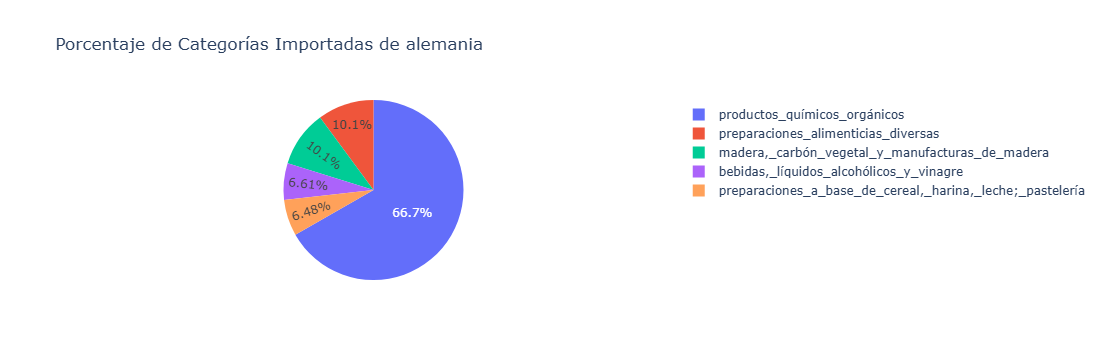

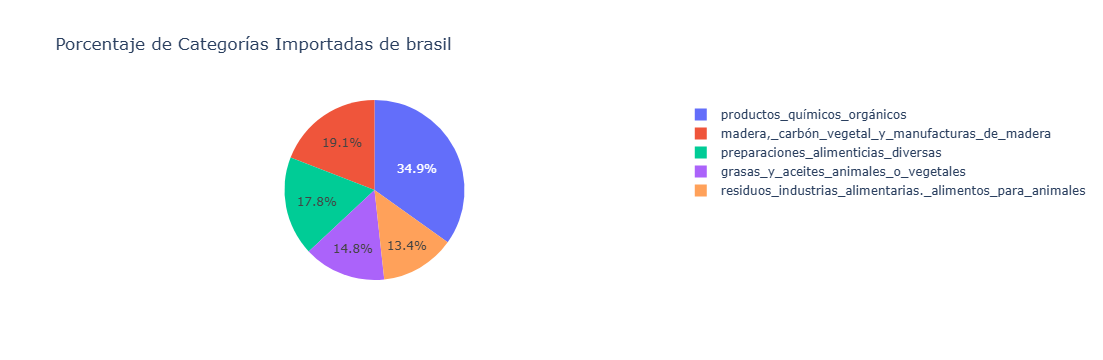

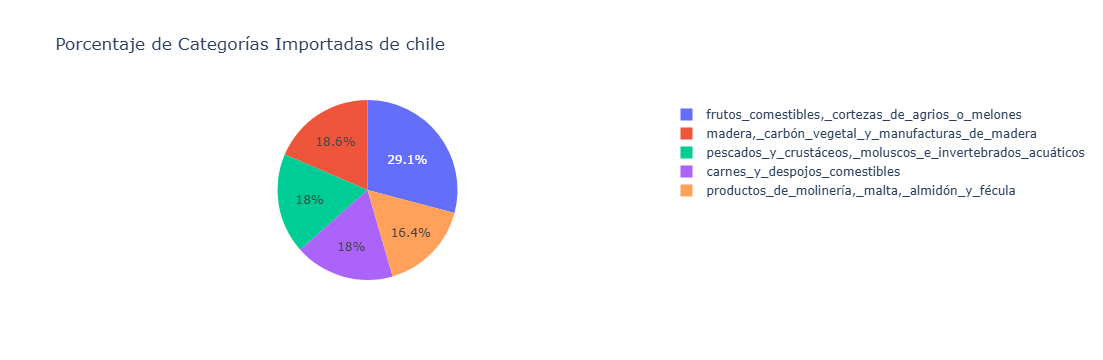

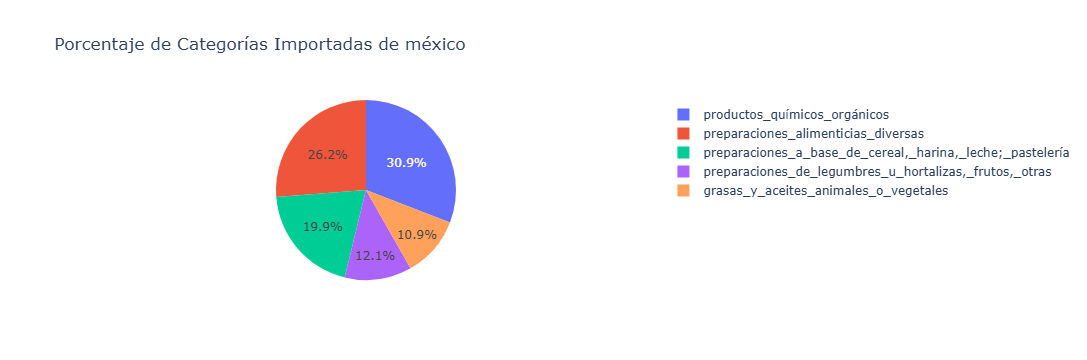

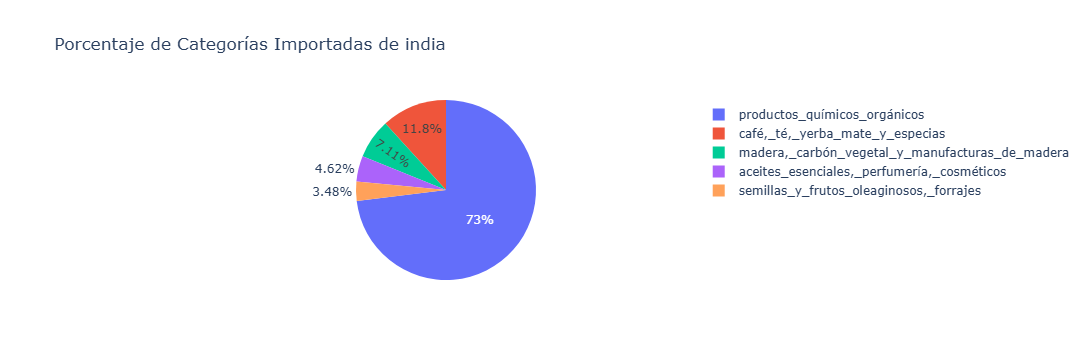

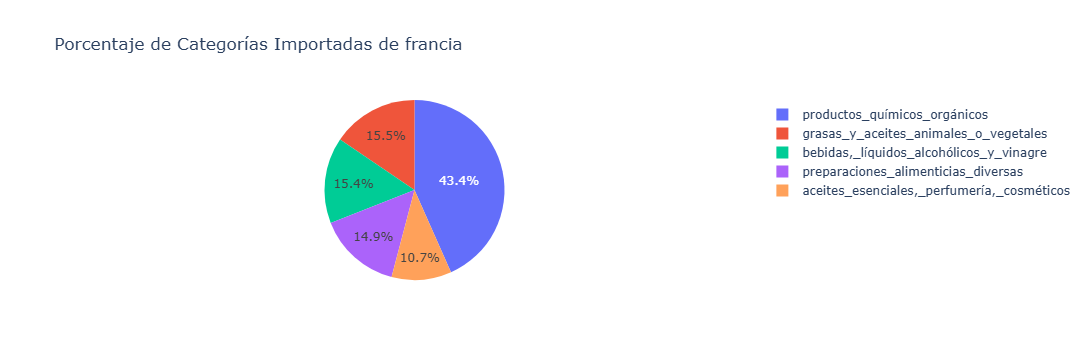

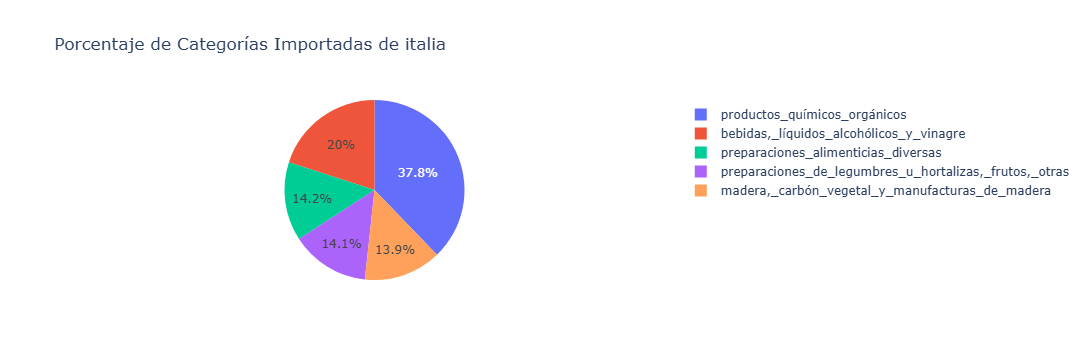

In [46]:
#=====================¿Qué es lo que más importamos de estos países?========================================

for pais in top_10_paises:
    pais_df = filtered_agriculture_df[filtered_agriculture_df['pais_de_origen'] == pais]
    categorias_exportadas = pais_df['nombre_capitulo'].value_counts().head(5).reset_index(name='conteo')
    categorias_exportadas.columns = ['nombre_capitulo', 'conteo']
    
    fig = px.pie(
        categorias_exportadas,
        names='nombre_capitulo',
        values='conteo',
        title=f"Porcentaje de Categorías Importadas de {pais}",
        labels={'nombre_capitulo': 'Categoría', 'conteo': 'Número de Exportaciones'},
        color='nombre_capitulo',
    )
    
    fig.show()

In [47]:
# Para terminar observemos el tamaño de todos los datasets que usamos

print(f"El dataset #1, Exportaciones_agricolas_no_tradicionales_y_tradicionales_20241102, contiene {data.shape[0]} filas y {data.shape[1]} columnas")
print(f"El dataset #2, Índices de precios de insumos agrícolas, contiene {data2.shape[0]} filas y {data2.shape[1]} columnas")
print(f"El dataset #3, exportations_2018_2024_complete {data_exporta.shape[0]} filas y {data_exporta.shape[1]} columnas")
print(f"El dataset #4, importaciones_2018_2024_complete {datos_impor.shape[0]} filas y {datos_impor.shape[1]} columnas")

El dataset #1, Exportaciones_agricolas_no_tradicionales_y_tradicionales_20241102, contiene 475785 filas y 9 columnas
El dataset #2, Índices de precios de insumos agrícolas, contiene 70 filas y 13 columnas
El dataset #3, exportations_2018_2024_complete 982634 filas y 19 columnas
El dataset #4, importaciones_2018_2024_complete 2661403 filas y 21 columnas
